In [2]:
import numpy as np
import pandas as pd
import os

In [3]:
for dirname,_,filenames in os.walk("./"):
        for filename in filenames:
            print(filename)

gender_submission.csv
Kaggle_titanic_oct_2021.ipynb
PYSB-Tutorials.ipynb
test_titanic.csv
train_titanic.csv
Kaggle_titanic_oct_2021-checkpoint.ipynb
PYSB-Tutorials-checkpoint.ipynb


In [4]:
test_data = pd.read_csv("test_titanic.csv")
train_data = pd.read_csv("train_titanic.csv")
gender_submission = pd.read_csv("gender_submission.csv")


In [5]:
data = pd.concat([train_data,test_data],ignore_index = True, sort = False)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [7]:
import pandas_profiling as pp
pp.ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import matplotlib.pylab as pylab
import matplotlib.cm as cm


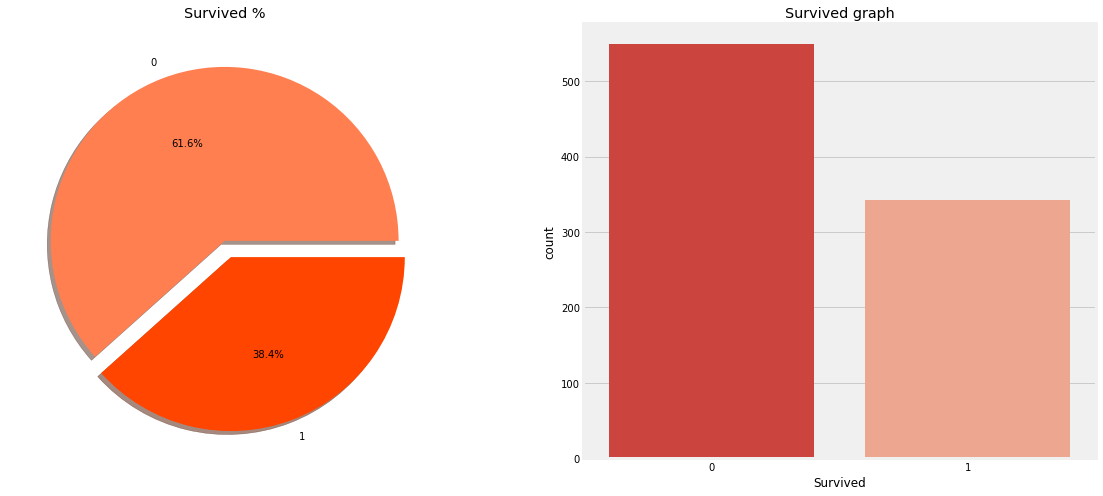

In [10]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
train_data['Survived'].value_counts().plot.pie(colors = ['#ff7f50', '#ff4500'], explode = [0, 0.1], autopct = '%1.1f%%', ax = ax[0],shadow = True)
ax[0].set_title('Survived %')
ax[0].set_ylabel('')
sns.countplot('Survived', data = train_data, ax = ax[1], palette='Reds_r')
ax[1].set_title('Survived graph')
plt.show()

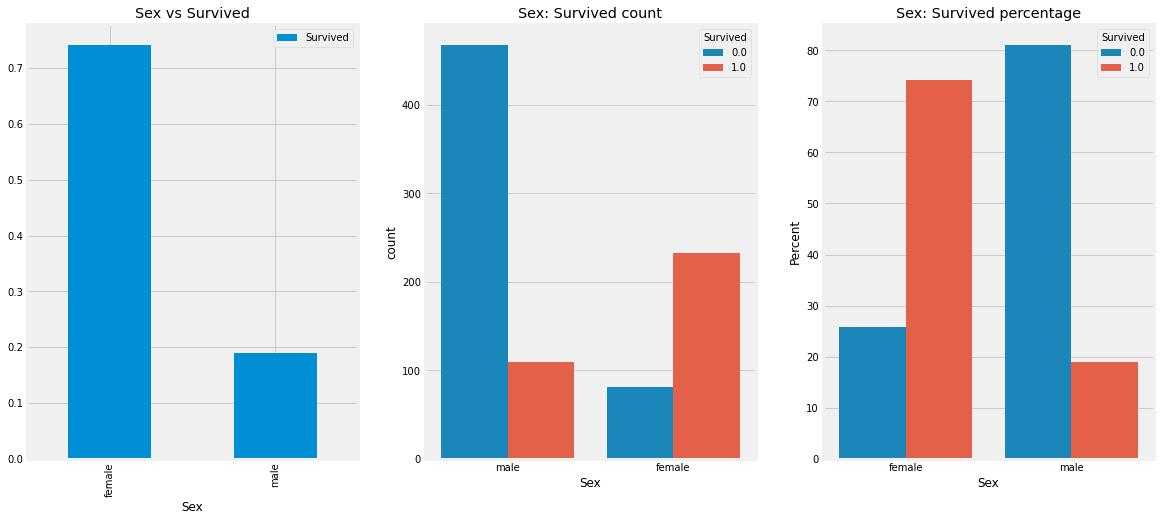

In [11]:
f, ax  = plt.subplots(1,3, figsize=(18,8))
data[['Sex','Survived']].groupby('Sex').mean().plot.bar(ax=ax[0])
ax[0].set_title("Sex vs Survived")
sns.countplot("Sex", hue="Survived", data=data, ax=ax[1])
ax[1].set_title("Sex: Survived count")
data.groupby("Sex")["Survived"].value_counts(normalize=True).mul(100).rename("Percent").reset_index().pipe((sns.barplot,'data'),x ="Sex",y="Percent"
                                                                   , hue="Survived", ax=ax[2])
ax[2].set_title("Sex: Survived percentage")
plt.show()

In [12]:
pd.crosstab(train_data.Pclass, train_data.Survived, margins=True).style.background_gradient(cmap="Oranges")

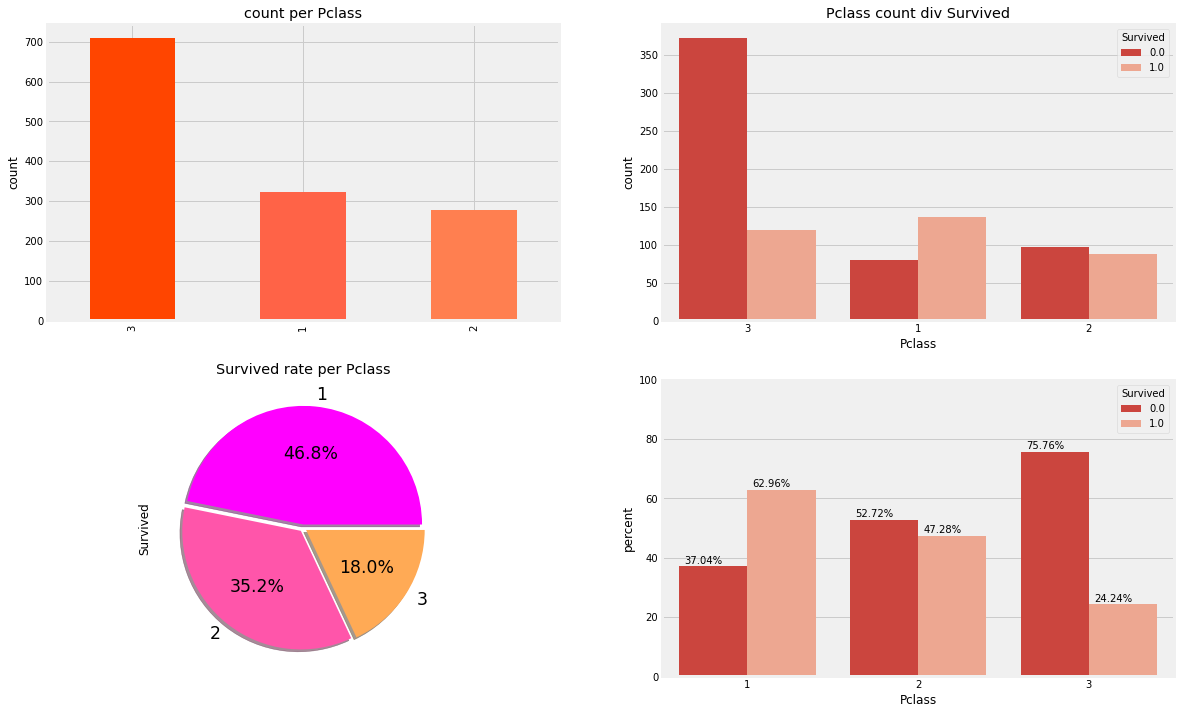

In [13]:
dataf, ax = plt.subplots(2,2, figsize=(18,12))
data["Pclass"].value_counts().plot.bar(color=['#ff4500', '#ff6347', '#ff7f50'], ax=ax[0,0])
ax[0, 0].set_title("count per Pclass")
ax[0, 0].set_ylabel("count")
sns.countplot("Pclass", hue="Survived", data = data, ax = ax[0,1], palette="Reds_r"
             ,order=data["Pclass"].value_counts(normalize=True).index)
plass_percent_df = data.groupby('Pclass')['Survived'].value_counts(normalize = True).mul(100).rename('percent').reset_index()
g = sns.barplot('Pclass', 'percent', hue='Survived', data=plass_percent_df, ax=ax[1,1], palette="Reds_r")
g._axes.set_ylim(0,100)
for p in g._axes.patches:
    txt = str(p.get_height().round(2))+'%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    g._axes.text(txt_x+0.03,txt_y+1,txt)

ax[0, 1].set_title('Pclass count div Survived')
data.groupby('Pclass')['Survived'].mean().plot.pie(colors = [cm.spring(float(co)/3) for co in range(3)]
                                                   , autopct='%1.1f%%', ax = ax[1,0], shadow = True, explode = (0.03, 0.03, 0.03),
                                                  textprops = {'size':'xx-large'})
ax[1, 0].set_title('Survived rate per Pclass')
plt.show()

In [14]:
data.groupby('Pclass').count()

PassengerId  Survived  Name  Sex  Age  SibSp  Parch  Ticket  Fare  \
Pclass                                                                      
1               323       216   323  323  284    323    323     323   323   
2               277       184   277  277  261    277    277     277   277   
3               709       491   709  709  501    709    709     709   708   

        Cabin  Embarked  
Pclass                   
1         256       321  
2          23       277  
3          16       709

In [15]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap="Oranges")

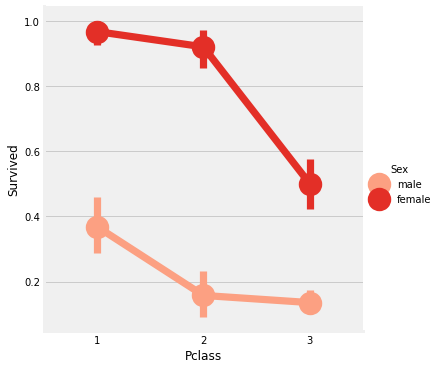

In [16]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data, palette="Reds")

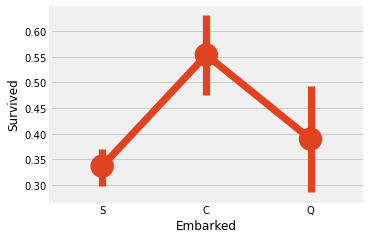

In [17]:
sns.factorplot('Embarked', 'Survived', data=data, color = '#E2421F')
fig = plt.gcf()
fig.set_size_inches(5, 3)
plt.show()

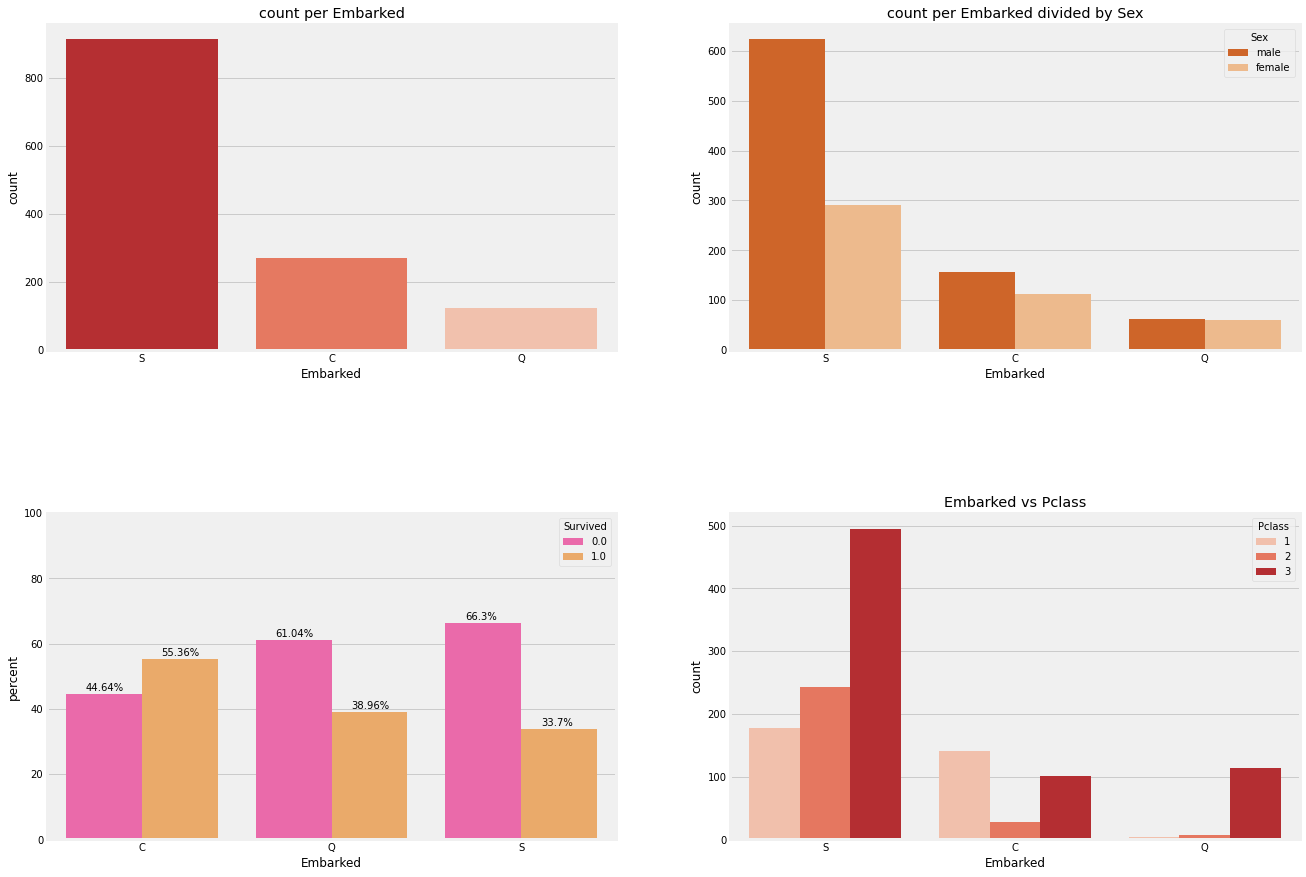

In [18]:
f, ax = plt.subplots(2, 2, figsize=(20,15))
sns.countplot('Embarked', data=data, ax=ax[0,0], palette='Reds_r')
ax[0,0].set_title('count per Embarked')
sns.countplot('Embarked', hue='Sex', data=data, ax=ax[0,1], palette='Oranges_r')
ax[0,1].set_title('count per Embarked divided by Sex')
pclass_percet_df = data.groupby('Embarked')['Survived'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
g = sns.barplot('Embarked', 'percent', hue = 'Survived', data= pclass_percet_df, ax = ax[1,0], palette = 'spring')
g._axes.set_ylim(0, 100)

for p in g._axes.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    g._axes.text(txt_x+0.105, txt_y+1, txt)

sns.countplot('Embarked',hue = 'Pclass', data = data, ax = ax[1,1], palette = 'Reds')
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace = 0.2, hspace = 0.5 )
plt.show()

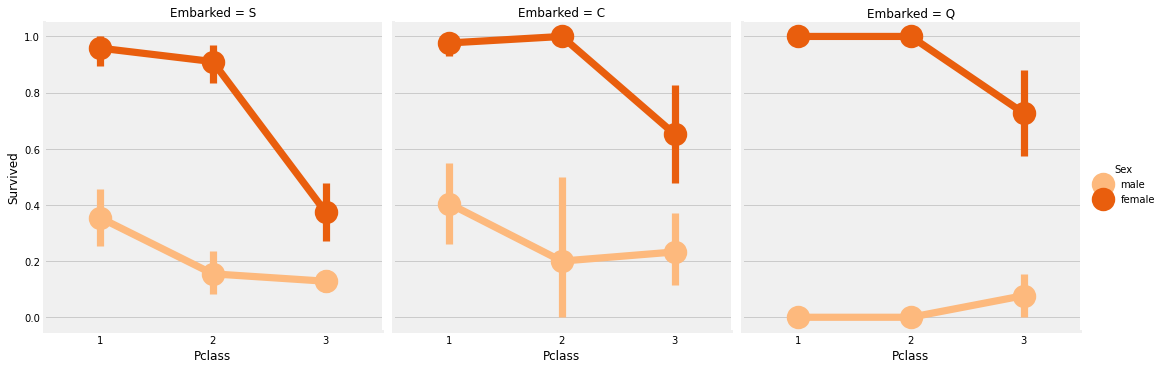

In [19]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex', data=data, col = 'Embarked', palette = 'Oranges' )
plt.show()

In [20]:
pd.crosstab([train_data.Embarked, train_data.Pclass], [train_data.Sex, train_data.Survived], margins = True).style.background_gradient(cmap = 'Oranges')

In [21]:
data[data['Embarked'].isnull()]

PassengerId  Survived  Pclass                                       Name  \
61            62       1.0       1                        Icard, Miss. Amelie   
829          830       1.0       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   female  38.0      0      0  113572  80.0   B28      NaN  
829  female  62.0      0      0  113572  80.0   B28      NaN

In [22]:
C = data[(data['Embarked'] == 'C') & (data['Pclass'] == 1)]['Fare'].median()
S = data[(data['Embarked'] == 'S') & (data['Pclass'] == 1)]['Fare'].median()
Q = data[(data['Embarked'] == 'Q') & (data['Pclass'] == 1)]['Fare'].median()

print(C, S, Q)

76.7292 52.0 90.0


In [23]:
data['Embarked'] = data['Embarked'].fillna('C')

In [24]:
data['Embarked'].isnull().any()

False

In [25]:
print(train_data['Age'].min(), train_data['Age'].max())

0.42 80.0


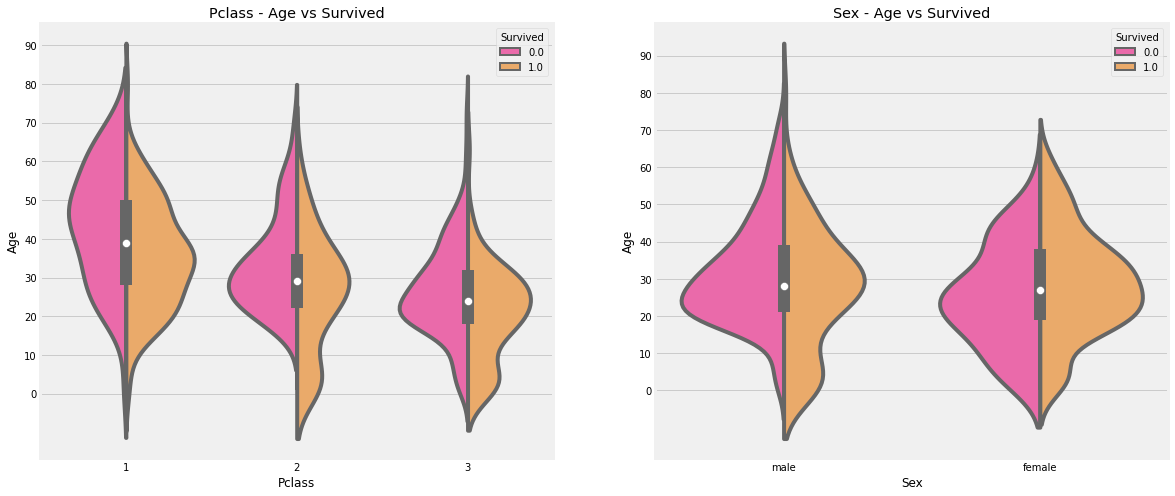

In [26]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
sns.violinplot('Pclass', 'Age', hue = 'Survived', data = data, split = True, ax = ax[0], palette = 'spring')
ax[0].set_title('Pclass - Age vs Survived')
ax[0].set_yticks(range(0, 100, 10))
sns.violinplot('Sex', 'Age', hue = 'Survived', data = data, split = True, ax = ax[1], palette = 'spring')
ax[1].set_title('Sex - Age vs Survived')
ax[1].set_yticks(range(0, 100, 10))
plt.show()

In [27]:
data['Initial'] = 0

for _ in data:
    data['Initial'] = data.Name.str.extract(r'([A-Za-z]+)\.')

In [28]:
data

PassengerId  Survived  Pclass  \
0               1       0.0       3   
1               2       1.0       1   
2               3       1.0       3   
3               4       1.0       1   
4               5       0.0       3   
...           ...       ...     ...   
1304         1305       NaN       3   
1305         1306       NaN       1   
1306         1307       NaN       3   
1307         1308       NaN       3   
1308         1309       NaN       3   

                                                   Name     Sex   Age  SibSp  \
0                               Braund, Mr. Owen Harris    male  22.0      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                                Heikkinen, Miss. Laina  female  26.0      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                              Allen, Mr. William Henry    male  35.0      0   
...                                                 ...     ...   ...    ...   
1304                                 Spector, Mr. Woolf    male   NaN      0   
1305                       Oliva y Ocana, Dona. Fermina  female  39.0      0   
1306                       Saether, Mr. Simon Sivertsen    male  38.5      0   
1307                                Ware, Mr. Frederick    male   NaN      0   
1308                           Peter, Master. Michael J    male   NaN      1   

      Parch              Ticket      Fare Cabin Embarked Initial  
0         0           A/5 21171    7.2500   NaN        S      Mr  
1         0            PC 17599   71.2833   C85        C     Mrs  
2         0    STON/O2. 3101282    7.9250   NaN        S    Miss  
3         0              113803   53.1000  C123        S     Mrs  
4         0              373450    8.0500   NaN        S      Mr  
...     ...                 ...       ...   ...      ...     ...  
1304      0           A.5. 3236    8.0500   NaN        S      Mr  
1305      0            PC 17758  108.9000  C105        C    Dona  
1306      0  SOTON/O.Q. 3101262    7.2500   NaN        S      Mr  
1307      0              359309    8.0500   NaN        S      Mr  
1308      1                2668   22.3583   NaN        C  Master  

[1309 rows x 13 columns]

In [29]:
pd.crosstab(data.Initial, data.Sex, margins=True).T.style.background_gradient(cmap='Reds')

In [30]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess', 'the Countess', 'Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],['Miss', 'Mrs', 'Mrs', 'Officer', 'Officer', 'Royalty', 'Royalty', 'Royalty', 'Master', 'Officer', 'Officer', 'Officer', 'Royalty', 'Royalty', 'Royalty'],inplace=True)

In [32]:
#First, initialize the data
#先ずはデータの初期化
train_data = pd.read_csv('train_titanic.csv')
test_data = pd.read_csv('test_titanic.csv')
submission_data = pd.read_csv('gender_submission.csv')
data = pd.concat([train_data, test_data], ignore_index = True, sort = False)

data['Embarked'] = data['Embarked'].fillna('C')

data['Initial'] = 0
for _ in data:
    data['Initial'] = data.Name.str.extract(r'([A-Za-z]+)\.')
    
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess', 'the Countess', 'Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],['Miss', 'Mrs', 'Mrs', 'Officer', 'Officer', 'Royalty', 'Royalty', 'Royalty', 'Master', 'Officer', 'Officer', 'Officer', 'Royalty', 'Royalty', 'Royalty'],inplace=True)

In [33]:
from sklearn.ensemble import RandomForestRegressor

age_df = data[['Age', 'Pclass', 'Sex', 'Parch', 'SibSp']]

#one-hot encoding 
age_df = pd.get_dummies(age_df)

#Since we are guessing the missing data in Age, we will use it as test data
not_null_age = age_df[age_df.Age.notnull()].values
is_null_age = age_df[age_df.Age.isnull()].values
#split train_data into explanation variable and target variable.
X = not_null_age[:, 1:]
y = not_null_age[:, 0]

#create the inference model by RandomForest
rfr = RandomForestRegressor(random_state = 0, n_estimators = 100, n_jobs = -1)
rfr.fit(X, y)

#using above model, we complement the Age feature in test data
pre_Ages = rfr.predict(is_null_age[:, 1:])
data.loc[(data.Age.isnull()), 'Age'] = pre_Ages

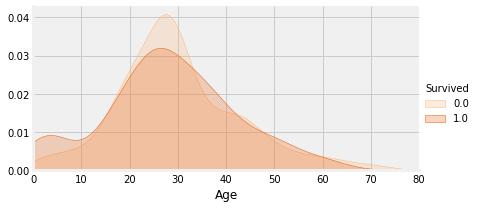

In [34]:
facet = sns.FacetGrid(data[:len(train_data)], hue = 'Survived', aspect = 2, palette = 'Oranges')
facet.map(sns.kdeplot, 'Age', shade = True)
facet.set(xlim = (0, data.loc[:len(train_data), 'Age'].max()))
facet.add_legend()
plt.show()

In [35]:
data['Age_range'] = 0
data.loc[(data['Age'] <= 16), 'Age_range'] = 0
data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age_range'] = 1
data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age_range'] = 2
data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age_range'] = 3
data.loc[(data['Age'] > 64), 'Age_range'] = 4

In [36]:
data['Age_range'].value_counts().to_frame().style.background_gradient(cmap='Oranges')

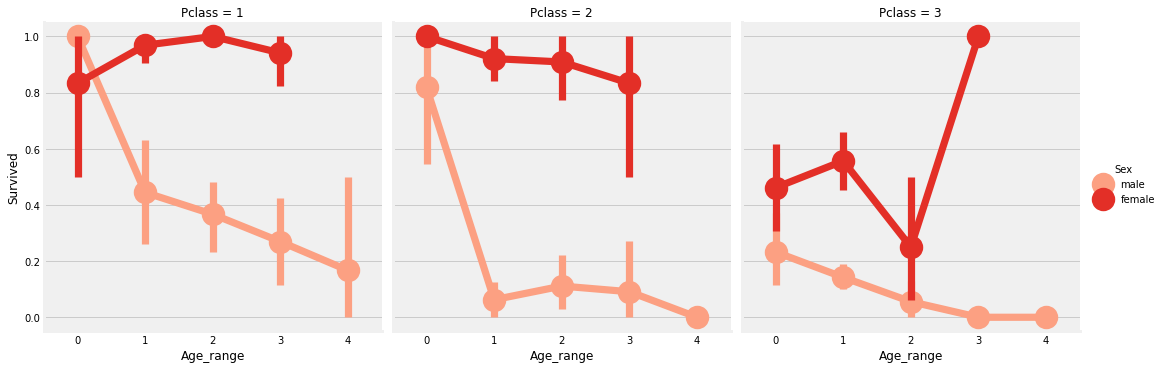

In [37]:
sns.factorplot('Age_range', 'Survived', data = data, hue = 'Sex', col = 'Pclass', palette = 'Reds')
plt.show()

In [38]:
data['Family_Size'] = 0
data['Family_Size'] = data['SibSp'] + data['Parch'] + 1#this 1 is the person himself.


In [39]:
data['Alone'] = 0
data.loc[data.Family_Size == 1, 'Alone'] = 1

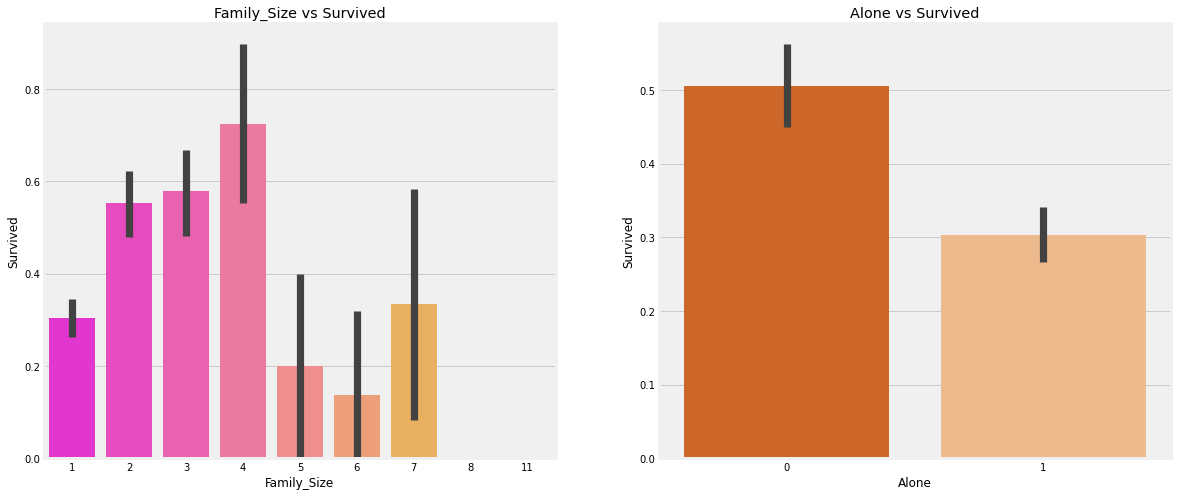

In [40]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
sns.barplot('Family_Size', 'Survived', data = data, ax = ax[0], palette = 'spring')
ax[0].set_title('Family_Size vs Survived')
sns.barplot('Alone', 'Survived', data = data, palette = 'Oranges_r')
ax[1].set_title('Alone vs Survived')
plt.show()

<AxesSubplot:xlabel='Family_label', ylabel='Survived'>

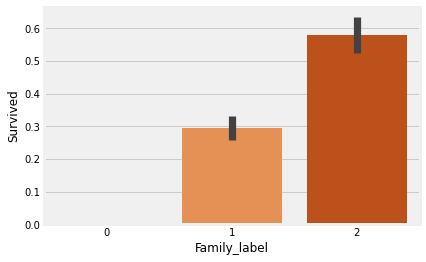

In [41]:
def Family_label(s):
    if (s >= 2) & (s <= 4):
        return 2
    elif ((s >= 5) & (s <= 7)) | (s == 1):
        return 1
    elif (s > 7):
        return 0
    
data['Family_label'] = data['Family_Size'].apply(Family_label)
sns.barplot('Family_label', 'Survived', data = data, palette = 'Oranges')

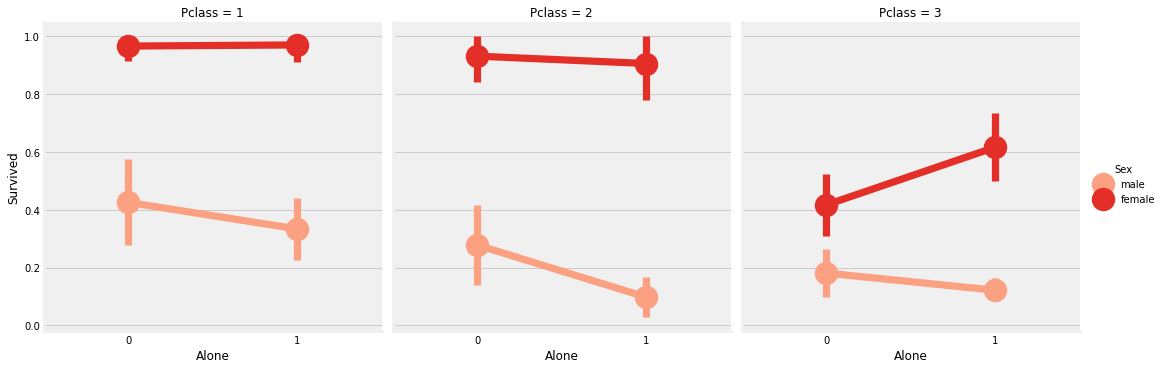

In [42]:
sns.factorplot('Alone', 'Survived', data = data, hue = 'Sex', col = 'Pclass', palette = 'Reds')
plt.show()

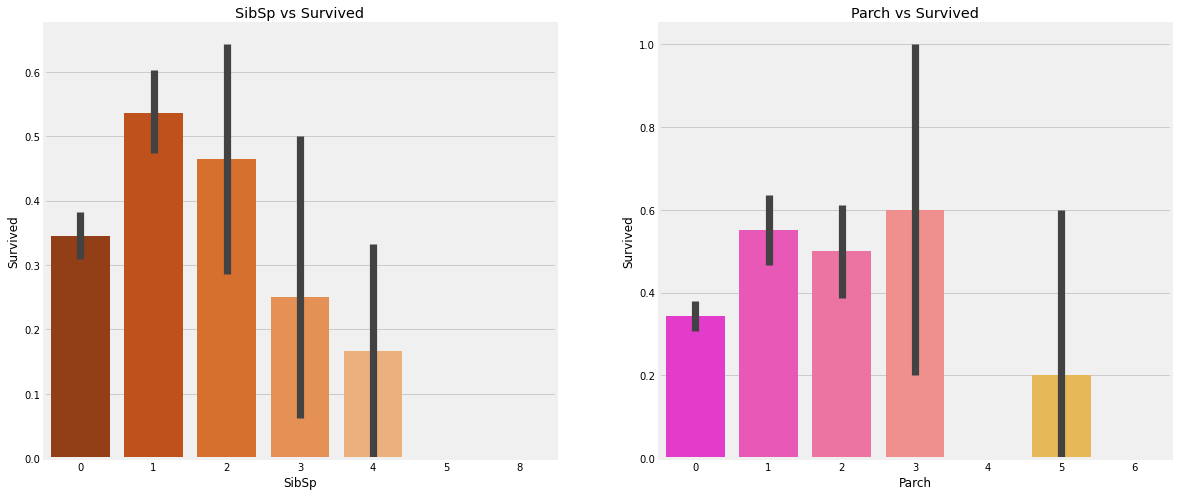

In [43]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
sns.barplot('SibSp', 'Survived', data = train_data, ax = ax[0], palette = 'Oranges_r')
ax[0].set_title('SibSp vs Survived')
sns.barplot('Parch', 'Survived', data = train_data, ax = ax[1], palette = 'spring')
ax[1].set_title('Parch vs Survived')
plt.show()

In [44]:
data['Surname'] = data['Name'].map(lambda name:name.split(',')[0].strip())



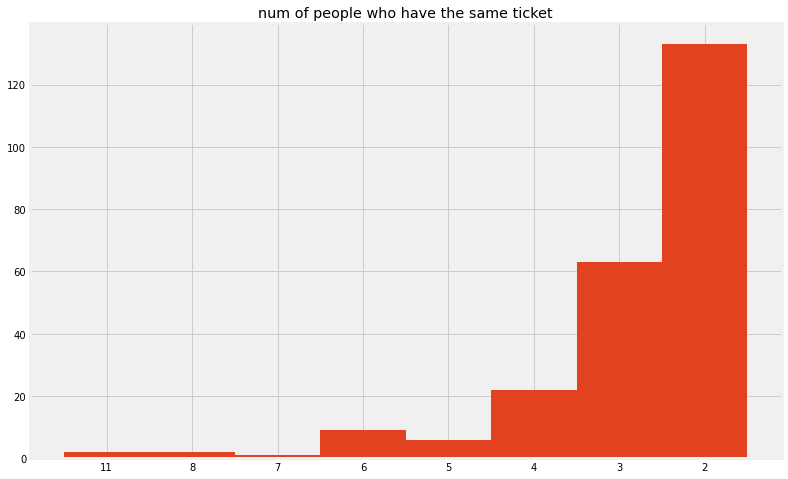

In [45]:
data['Surname'] = data['Name'].map(lambda name:name.split(',')[0].strip())
import collections
f, ax = plt.subplots(1, 1, figsize = (12, 8))
d__ = {k: v for k, v in dict(data['Surname'].value_counts()).items() if v >= 2}
y__ = d__.values()
c__ = collections.Counter(y__)
labels_, values_ = zip(*c__.items())
indexes = np.arange(len(labels_))
plt.bar(indexes, values_, 1, color = ['#E2421F'])
ax.set_title('num of people who have the same ticket')
plt.xticks(indexes, labels_)
plt.show()

In [46]:
#同じ苗字の出現頻度をカウント
data['family_sur_num'] = data['Surname'].map(data['Surname'].value_counts())
data

PassengerId  Survived  Pclass  \
0               1       0.0       3   
1               2       1.0       1   
2               3       1.0       3   
3               4       1.0       1   
4               5       0.0       3   
...           ...       ...     ...   
1304         1305       NaN       3   
1305         1306       NaN       1   
1306         1307       NaN       3   
1307         1308       NaN       3   
1308         1309       NaN       3   

                                                   Name     Sex        Age  \
0                               Braund, Mr. Owen Harris    male  22.000000   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                                Heikkinen, Miss. Laina  female  26.000000   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                              Allen, Mr. William Henry    male  35.000000   
...                                                 ...     ...        ...   
1304                                 Spector, Mr. Woolf    male  28.421211   
1305                       Oliva y Ocana, Dona. Fermina  female  39.000000   
1306                       Saether, Mr. Simon Sivertsen    male  38.500000   
1307                                Ware, Mr. Frederick    male  28.421211   
1308                           Peter, Master. Michael J    male  16.933814   

      SibSp  Parch              Ticket      Fare Cabin Embarked  Initial  \
0         1      0           A/5 21171    7.2500   NaN        S       Mr   
1         1      0            PC 17599   71.2833   C85        C      Mrs   
2         0      0    STON/O2. 3101282    7.9250   NaN        S     Miss   
3         1      0              113803   53.1000  C123        S      Mrs   
4         0      0              373450    8.0500   NaN        S       Mr   
...     ...    ...                 ...       ...   ...      ...      ...   
1304      0      0           A.5. 3236    8.0500   NaN        S       Mr   
1305      0      0            PC 17758  108.9000  C105        C  Royalty   
1306      0      0  SOTON/O.Q. 3101262    7.2500   NaN        S       Mr   
1307      0      0              359309    8.0500   NaN        S       Mr   
1308      1      1                2668   22.3583   NaN        C   Master   

      Age_range  Family_Size  Alone  Family_label        Surname  \
0             1            2      0             2         Braund   
1             2            2      0             2        Cumings   
2             1            1      1             1      Heikkinen   
3             2            2      0             2       Futrelle   
4             2            1      1             1          Allen   
...         ...          ...    ...           ...            ...   
1304          1            1      1             1        Spector   
1305          2            1      1             1  Oliva y Ocana   
1306          2            1      1             1        Saether   
1307          1            1      1             1           Ware   
1308          1            3      0             2          Peter   

      family_sur_num  
0                  2  
1                  2  
2                  1  
3                  2  
4                  2  
...              ...  
1304               1  
1305               1  
1306               1  
1307               4  
1308               3  

[1309 rows x 19 columns]

In [47]:
#data['family_sur_num'] >= 2 represents the duplications of surnames.
Female_Child_Group = data.loc[(data['family_sur_num'] >= 2) & ((data['Age'] <= 16) | (data['Sex'] == 'female'))]
Male_Adult_group = data.loc[(data['family_sur_num'] >= 2) & (data['Age'] > 16) & (data['Sex'] == 'male')]
Female_Child_mean = Female_Child_Group.groupby('Surname')['Survived'].mean()
Male_Adult_mean = Male_Adult_group.groupby('Surname')['Survived'].mean()
print(Female_Child_mean.value_counts())
print('-' * 28)
print(Male_Adult_mean.value_counts())

1.000000    113
0.000000     32
0.750000      2
0.500000      1
0.333333      1
0.142857      1
Name: Survived, dtype: int64
----------------------------
0.000000    115
1.000000     21
0.500000      6
0.333333      2
0.250000      1
Name: Survived, dtype: int64


In [48]:
Dead_List = set(Female_Child_mean[Female_Child_mean.apply(lambda x:x == 0)].index)
Survive_List = set(Male_Adult_mean[Male_Adult_mean.apply(lambda x:x == 1)].index)
print(Dead_List)
print(Survive_List)

{'Zabour', 'Ford', 'Canavan', 'Vander Planke', 'Oreskovic', 'Sage', 'Panula', 'Strom', 'Johnston', 'Arnold-Franchi', 'Lahtinen', 'Jussila', 'Robins', 'Attalah', 'Van Impe', 'Palsson', 'Lefebre', 'Bourke', 'Caram', 'Elias', 'Ilmakangas', 'Boulos', 'Turpin', 'Skoog', 'Rosblom', 'Barbara', 'Olsson', 'Lobb', 'Danbom', 'Cacic', 'Goodwin', 'Rice'}
{'Harder', 'Daly', 'Bradley', 'Dick', 'Greenfield', 'Jussila', 'McCoy', 'Frolicher-Stehli', 'Jonsson', 'Frauenthal', 'Moubarek', 'Beckwith', 'Bishop', 'Beane', 'Cardeza', 'Kimball', 'Nakid', 'Taylor', 'Duff Gordon', 'Goldenberg', 'Chambers'}


In [49]:
data.loc[(data['Survived'].isnull()) & (data['Surname'].apply(lambda x:x in Dead_List)), ['Sex', 'Age', 'Initial']] = ['male', 28.0, 'Mr']
data.loc[(data['Survived'].isnull()) & (data['Surname'].apply(lambda x:x in Survive_List)), ['Sex', 'Age', 'Initial']] = ['female', 5.0, 'Mrs']

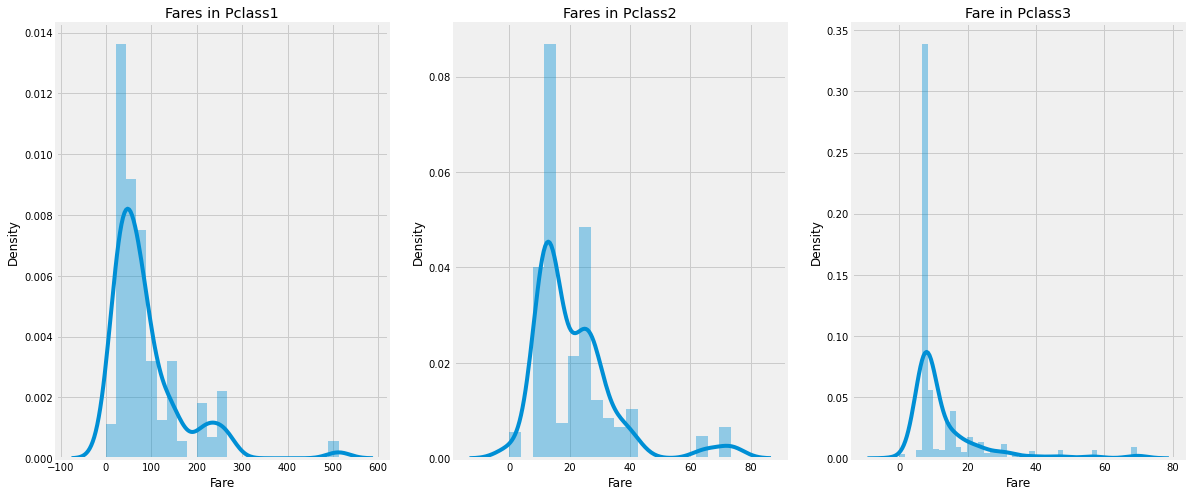

In [50]:
f, ax = plt.subplots(1, 3, figsize = (18, 8))
sns.distplot(data[data['Pclass'] == 1].Fare, ax = ax[0])
ax[0].set_title('Fares in Pclass1')
sns.distplot(data[data['Pclass'] == 2].Fare, ax = ax[1])
ax[1].set_title('Fares in Pclass2')
sns.distplot(data[data['Pclass'] == 3].Fare, ax = ax[2])
ax[2].set_title('Fare in Pclass3')
plt.show()

In [51]:
fare = data.loc[(data['Embarked'] == 'S') & (data['Pclass'] == 3) & (data['Sex'] == 'male'), 'Fare'].median()
data['Fare'] = data['Fare'].fillna(fare)

In [52]:
data['Fare_range'] = pd.qcut(data['Fare'], 4)



<AxesSubplot:xlabel='Fare_range', ylabel='count'>

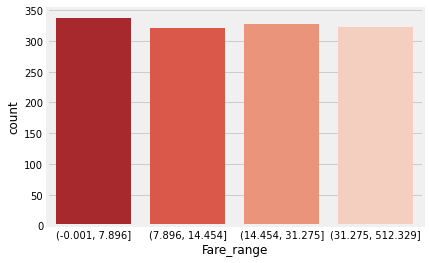

In [53]:
sns.countplot('Fare_range', data = data, palette='Reds_r')


In [54]:
data.groupby(['Fare_range'])['Survived'].mean().to_frame().style.background_gradient(cmap = 'Oranges')


In [55]:
data['Fare_cat'] = 0
data.loc[data['Fare'] <= 7.896, 'Fare_cat'] = 0
data.loc[(data['Fare'] > 7.896) & (data['Fare'] <= 14.454), 'Fare_cat'] = 1
data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31.275), 'Fare_cat'] = 2
data.loc[(data['Fare'] > 31.275) & (data['Fare'] <= 513), 'Fare_cat'] = 3

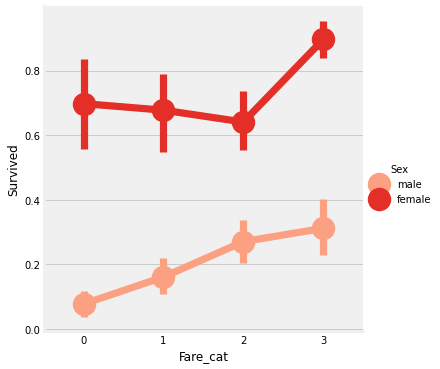

In [56]:
sns.factorplot('Fare_cat', 'Survived', data = data, hue = 'Sex', palette = 'Reds')
plt.show()

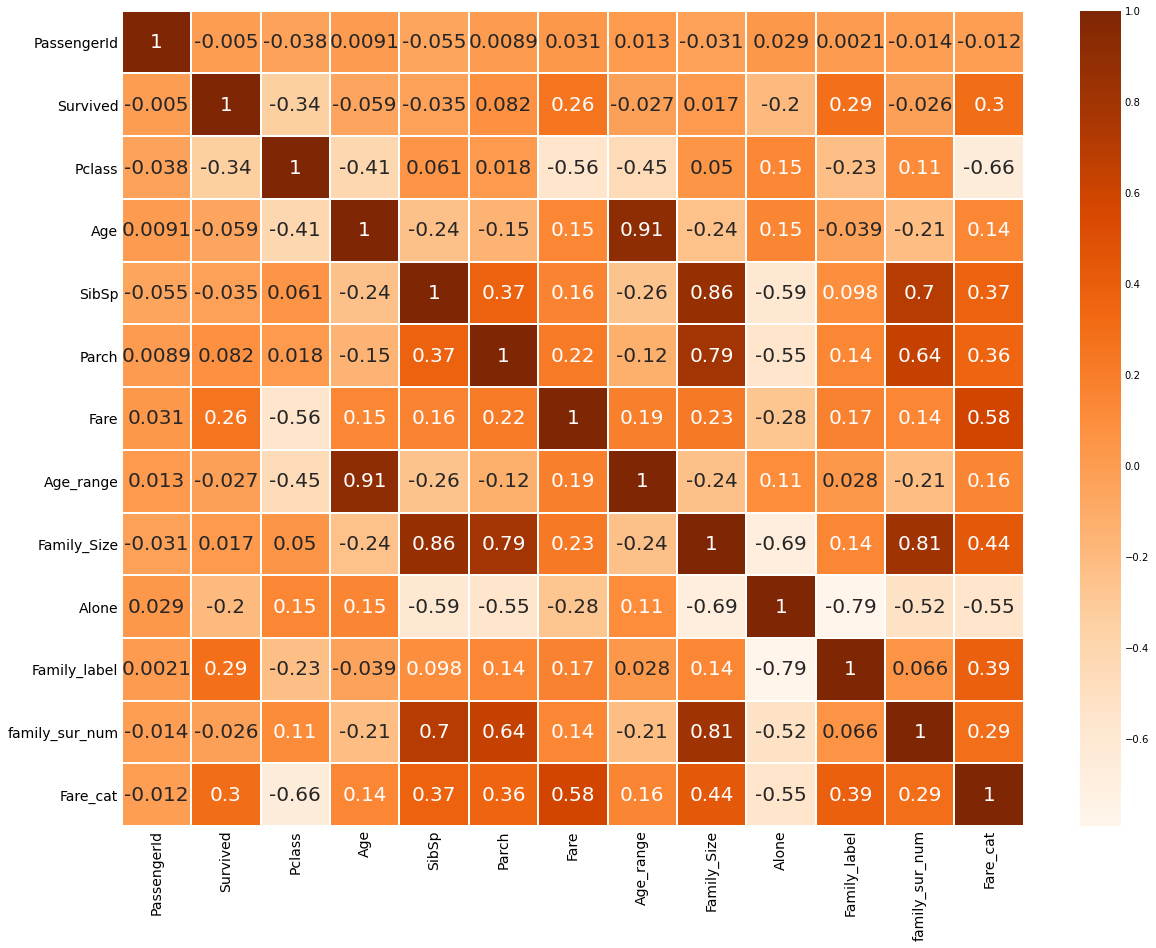

In [57]:
sns.heatmap(data.corr(), annot = True, cmap = 'Oranges', linewidths = 0.2, annot_kws = {'size': 20})
fig = plt.gcf()
fig.set_size_inches(18, 15)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

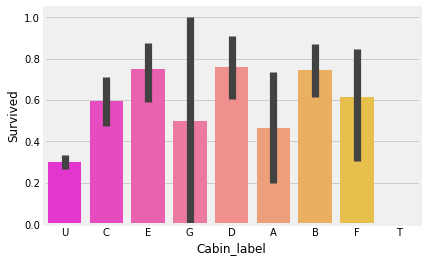

In [58]:
data['Cabin'] = data['Cabin'].fillna('Unknown')
data['Cabin_label'] = data['Cabin'].str.get(0)
sns.barplot(x = 'Cabin_label', y = 'Survived', data = data, palette = 'spring')
plt.show()

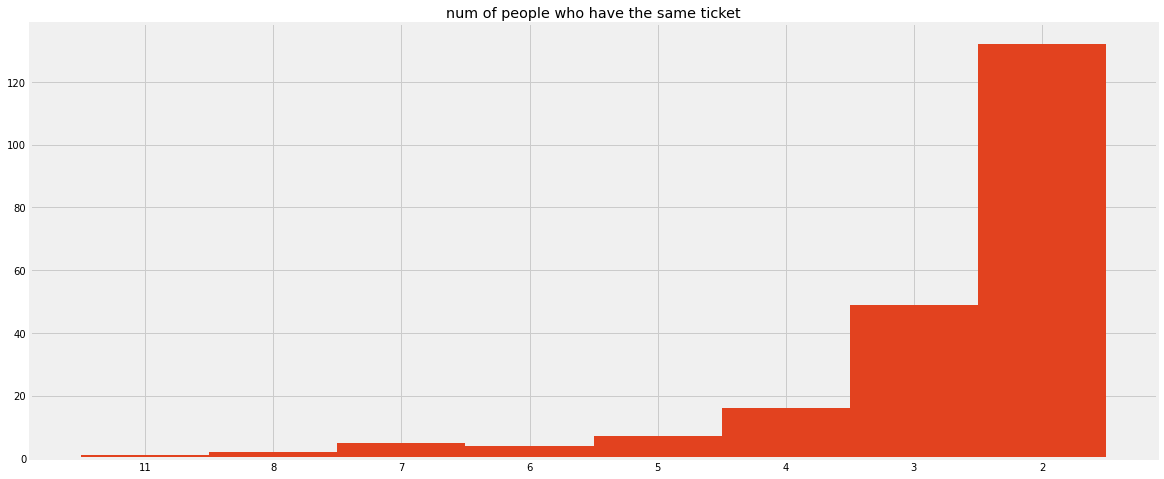

dict_values([11, 8, 8, 7, 7, 7, 7, 7, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [81]:
import collections, sys
f, ax = plt.subplots(1, 1, figsize = (18, 8))
d__ = {k: v for k, v in dict(data['Ticket'].value_counts()).items() if v >= 2}
y__ = d__.values()
c__ = collections.Counter(y__)
labels_, values_ = zip(*c__.items())
indexes = np.arange(len(labels_))
plt.bar(indexes, values_, 1, color = ['#E2421F'])
ax.set_title('num of people who have the same ticket')
plt.xticks(ticks = indexes, labels = labels_)
plt.show()
y__

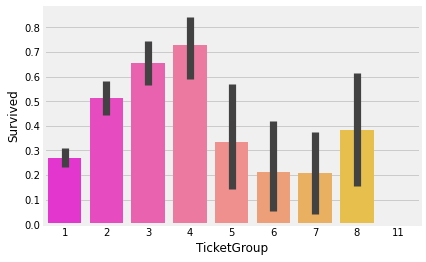

In [88]:
Ticket_count = dict(data['Ticket'].value_counts())
data['TicketGroup'] = data['Ticket'].map(Ticket_count)
sns.barplot('TicketGroup', 'Survived', data = data, palette = 'spring')
plt.show()

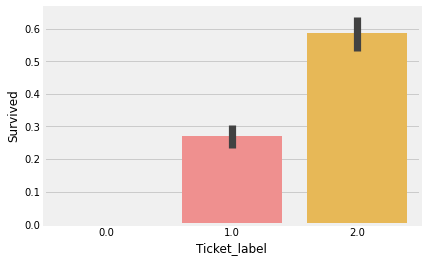

In [91]:
data.loc[(data['TicketGroup'] >= 2) & (data['TicketGroup'] <= 4), 'Ticket_label'] = 2
data.loc[(data['TicketGroup'] >= 5) & (data['TicketGroup'] <= 8) | (data['TicketGroup'] == 1), 'Ticket_label'] = 1
data.loc[data['TicketGroup'] == 11, 'Ticket_label'] = 0

sns.barplot('Ticket_label', 'Survived', data = data, palette = 'spring')
plt.show()

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectKBest

In [94]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_range','PassengerId', 'Surname', 'Family_Size', 'family_sur_num'], axis = 1, inplace = True)

In [96]:
data_ = pd.get_dummies(data)

In [97]:
print(data_.columns)
print(len(data_.columns))
print(data_.shape)

Index(['Survived', 'Pclass', 'SibSp', 'Parch', 'Age_range', 'Alone',
       'Family_label', 'Fare_cat', 'TicketGroup', 'Ticket_label', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Initial_Master',
       'Initial_Miss', 'Initial_Mr', 'Initial_Mrs', 'Initial_Officer',
       'Initial_Royalty', 'Cabin_label_A', 'Cabin_label_B', 'Cabin_label_C',
       'Cabin_label_D', 'Cabin_label_E', 'Cabin_label_F', 'Cabin_label_G',
       'Cabin_label_T', 'Cabin_label_U'],
      dtype='object')
30
(1309, 30)


In [98]:
train_data = data_[data_['Survived'].notnull()]
test_data = data_[data_['Survived'].isnull()].drop('Survived', axis=1)

In [99]:
print(train_data.shape, test_data.shape)

(891, 30) (418, 29)


In [100]:
train__X = train_data.values[:,1:]
train__y = train_data.values[:,0]
test__X = test_data.values


In [106]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func = f_regression, k = 20)
selector.fit(train__X, train__y)
mask = selector.get_support()
X_shape = selector.transform(train__X)
X_shape

array([[3., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [3., 0., 1., ..., 0., 0., 1.],
       ...,
       [3., 2., 0., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 0., 0.],
       [3., 0., 1., ..., 0., 0., 1.]])

In [112]:
a = data_.columns.drop('Survived')[mask]
a

Index(['Pclass', 'Parch', 'Alone', 'Family_label', 'Fare_cat', 'TicketGroup',
       'Ticket_label', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_S',
       'Initial_Master', 'Initial_Miss', 'Initial_Mr', 'Initial_Mrs',
       'Cabin_label_B', 'Cabin_label_C', 'Cabin_label_D', 'Cabin_label_E',
       'Cabin_label_U'],
      dtype='object')

In [113]:
from sklearn.feature_selection import SelectPercentile, f_regression

selector = SelectPercentile(score_func = f_regression, percentile = 70)
selector.fit(train__X, train__y)
mask = selector.get_support()
data_.columns.drop('Survived')[mask]

Index(['Pclass', 'Parch', 'Alone', 'Family_label', 'Fare_cat', 'TicketGroup',
       'Ticket_label', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_S',
       'Initial_Master', 'Initial_Miss', 'Initial_Mr', 'Initial_Mrs',
       'Cabin_label_B', 'Cabin_label_C', 'Cabin_label_D', 'Cabin_label_E',
       'Cabin_label_U'],
      dtype='object')

In [118]:
from sklearn.feature_selection import GenericUnivariateSelect, f_regression

selector = GenericUnivariateSelect(mode = 'fwe', score_func = f_regression, param = 70)
selector.fit(train__X, train__y)
mask  = selector.get_support()
data_.columns.drop('Survived')[mask]

Index(['Pclass', 'SibSp', 'Parch', 'Age_range', 'Alone', 'Family_label',
       'Fare_cat', 'TicketGroup', 'Ticket_label', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Initial_Master',
       'Initial_Miss', 'Initial_Mr', 'Initial_Mrs', 'Initial_Officer',
       'Initial_Royalty', 'Cabin_label_A', 'Cabin_label_B', 'Cabin_label_C',
       'Cabin_label_D', 'Cabin_label_E', 'Cabin_label_F', 'Cabin_label_G',
       'Cabin_label_T', 'Cabin_label_U'],
      dtype='object')

In [119]:
##################### Model based selsction- Multivariate #################################

In [126]:
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(RandomForestRegressor(n_estimators=100, random_state=42),threshold='median') 
selector.fit(train__X, train__y)
mask = selector.get_support()
data_.columns.drop('Survived')[mask]

Index(['Pclass', 'SibSp', 'Parch', 'Age_range', 'Family_label', 'Fare_cat',
       'TicketGroup', 'Ticket_label', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_S', 'Initial_Mr', 'Initial_Officer', 'Cabin_label_U'],
      dtype='object')

In [128]:
from sklearn.feature_selection import RFE

selector = RFE(RandomForestRegressor(n_estimators=100, random_state=42), n_features_to_select=15)
selector.fit(train__X, train__y)
rfe_mask = selector.get_support()
data_.columns.drop('Survived')[rfe_mask]

Index(['Pclass', 'SibSp', 'Parch', 'Age_range', 'Family_label', 'Fare_cat',
       'TicketGroup', 'Ticket_label', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_S', 'Initial_Mr', 'Initial_Officer', 'Cabin_label_U'],
      dtype='object')

In [129]:
li = ['Survived']
li.extend(data_.columns.drop('Survived')[rfe_mask].tolist())
train_data_ = train_data[li]
len(train_data_.columns)

16

In [130]:
test_data_ = test_data[data_.columns.drop('Survived')[rfe_mask].tolist()]

In [238]:
test_data_.shape

(418, 15)

In [142]:
train, test = train_test_split(train_data_, test_size=0.3, random_state=0, stratify=train_data['Survived'])
train_X = train[train.columns[1:]]
train_y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_y = test[test.columns[:1]]
X = train_data_[train_data_.columns[1:]]
y = train_data_['Survived']
X_combined = pd.concat([train_X, test_X])
y_combined = pd.concat([train_y, test_y])

In [246]:
print(train_X.shape)
print(test_X.shape)
print(train_y.shape)
print(test_y.shape)
print(X.shape)
print(y.shape)
print(X_combined.shape)
print(y_combined.shape)

(623, 15)
(268, 15)
(623, 1)
(268, 1)
(891, 15)
(891,)
(891, 15)
(891, 1)


In [148]:
print(X.shape)
print(y.shape)

(891, 15)
(891,)


In [150]:
############################### Linear Regression #################################################3

In [151]:
model = LogisticRegression()
model.fit(train_X, train_y)
pre1 = model.predict(test_X)
print("Model accuracy={}".format(metrics.accuracy_score(pre1, test_y)))

Model accuracy=0.8283582089552238


In [156]:
model = svm.SVC(kernel = 'linear', C=0.1, gamma=0.1)
model.fit(train_X, train_y)
pre2 = model.predict(test_X)
print(metrics.accuracy_score(pre2, test_y))

0.8208955223880597


In [157]:
model = svm.SVC(kernel = 'rbf', C=0.1, gamma=0.1)
model.fit(train_X, train_y)
pre3 = model.predict(test_X)
print(metrics.accuracy_score(pre3, test_y))

0.832089552238806


In [160]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth=11, random_state=1)
model.fit(train_X, train_y)
pre4 = model.predict(test_X)
print(metrics.accuracy_score(pre4, test_y))

0.8059701492537313


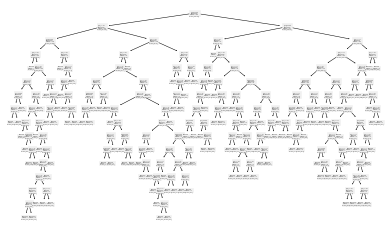

In [161]:
from sklearn import tree
import sys

model = DecisionTreeClassifier()
model.fit(train_X, train_y)
tree.plot_tree(model)
plt.show()

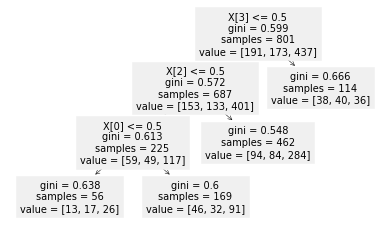

In [162]:
from sklearn import tree
import sys

selector = SelectKBest(score_func = f_regression, k = 5)
selector.fit(train__X, train__y)
mask = selector.get_support()
va = data_.columns.drop('Survived')[mask]
train_data__ = train_data[va]

train__, _ = train_test_split(train_data__, test_size = 0.1, random_state = 0, stratify = train_data['Survived'])
train_X_ = train__[train__.columns[1:]]
train_Y_ = train__[train__.columns[:1]]

model = DecisionTreeClassifier()
model.fit(train_X_, train_Y_)

tree.plot_tree(model)
plt.show()

In [167]:
model = RandomForestClassifier(criterion='entropy', n_estimators=22)
model.fit(train_X, train_y)
pre4_ = model.predict(test_X)
print(metrics.accuracy_score(pre4_, test_y))

0.8022388059701493


In [169]:
model = KNeighborsClassifier(n_neighbors=10)
model.fit(train_X, train_y)
pre5 = model.predict(test_X)
print(metrics.accuracy_score(pre5, test_y))

0.835820895522388


In [170]:
model = GaussianNB()
model.fit(train_X, train_y)
pre6 = model.predict(test_X)
print(metrics.accuracy_score(pre6, test_y))

0.7873134328358209


In [173]:
import optuna

def objective(trial):
    params = {
        'kernel':'rbf',
        'C': trial.suggest_loguniform('C', 1e-10, 1e10),
        'gamma': trial.suggest_loguniform('gamma', 1e-10, 3.0)
    }
    model_ = svm.SVC(**params)
    model_.fit(train_X, train_y)
    pre = model_.predict(test_X)
    acc = metrics.accuracy_score(pre, test_y)
    score = 1 - acc
    return score


In [174]:
study = optuna.create_study(sampler = optuna.samplers.RandomSampler(seed = 0))
study.optimize(objective, n_trials=100)
print(study.best_params)

[I 2021-11-05 13:55:33,330] A new study created in memory with name: no-name-afec54bd-8cc7-426b-88be-9b4625778e84
[I 2021-11-05 13:55:33,366] Trial 0 finished with value: 0.19402985074626866 and parameters: {'C': 9.468257892380656, 'gamma': 0.0031126171898301436}. Best is trial 0 with value: 0.19402985074626866.
[I 2021-11-05 13:55:33,400] Trial 1 finished with value: 0.1977611940298507 and parameters: {'C': 113.57101873457954, 'gamma': 5.1145470472838455e-05}. Best is trial 0 with value: 0.19402985074626866.
[I 2021-11-05 13:55:33,440] Trial 2 finished with value: 0.3843283582089553 and parameters: {'C': 0.029723228951884863, 'gamma': 0.0005849394875617427}. Best is trial 0 with value: 0.19402985074626866.
[I 2021-11-05 13:55:33,499] Trial 3 finished with value: 0.19029850746268662 and parameters: {'C': 0.05646043570251736, 'gamma': 0.22040115235965074}. Best is trial 3 with value: 0.19029850746268662.
[I 2021-11-05 13:55:33,561] Trial 4 finished with value: 0.17910447761194026 and pa

[I 2021-11-05 13:56:18,130] Trial 38 finished with value: 0.3843283582089553 and parameters: {'C': 4.530428195845917e-05, 'gamma': 1.8168285515762133e-09}. Best is trial 22 with value: 0.16044776119402981.
[I 2021-11-05 13:56:18,165] Trial 39 finished with value: 0.3843283582089553 and parameters: {'C': 8.371512893219726e-05, 'gamma': 1.7535764636462456e-09}. Best is trial 22 with value: 0.16044776119402981.
[I 2021-11-05 13:56:18,201] Trial 40 finished with value: 0.3843283582089553 and parameters: {'C': 0.00022890937936364, 'gamma': 2.189190852963536e-06}. Best is trial 22 with value: 0.16044776119402981.
[I 2021-11-05 13:56:18,236] Trial 41 finished with value: 0.3843283582089553 and parameters: {'C': 1.918447535906701e-09, 'gamma': 0.0017993446633534583}. Best is trial 22 with value: 0.16044776119402981.
[I 2021-11-05 13:56:18,271] Trial 42 finished with value: 0.3843283582089553 and parameters: {'C': 21.479743163350676, 'gamma': 6.032785393881993e-08}. Best is trial 22 with value:

[I 2021-11-05 13:56:55,512] Trial 77 finished with value: 0.3843283582089553 and parameters: {'C': 2.9950195182466216e-08, 'gamma': 0.07668051898931524}. Best is trial 22 with value: 0.16044776119402981.
[I 2021-11-05 13:56:56,818] Trial 78 finished with value: 0.16791044776119401 and parameters: {'C': 1400809.810032109, 'gamma': 9.1735502579267e-05}. Best is trial 22 with value: 0.16044776119402981.
[I 2021-11-05 13:56:56,853] Trial 79 finished with value: 0.3843283582089553 and parameters: {'C': 0.013920856110646305, 'gamma': 5.304824225626701e-10}. Best is trial 22 with value: 0.16044776119402981.
[I 2021-11-05 13:56:56,881] Trial 80 finished with value: 0.18656716417910446 and parameters: {'C': 8883.323192921962, 'gamma': 5.647050618067095e-06}. Best is trial 22 with value: 0.16044776119402981.
[I 2021-11-05 13:56:56,926] Trial 81 finished with value: 0.19029850746268662 and parameters: {'C': 27612.89804802471, 'gamma': 0.1194517953932935}. Best is trial 22 with value: 0.1604477611

{'C': 2164.383970701054, 'gamma': 0.001062561994257736}


In [175]:
model = svm.SVC(kernel='rbf', C = 2164.383970701054, gamma = 0.001062561994257736)
model.fit(train_X, train_y)
pre_3 = model.predict(test_X)
print('Accuracy for rbf SVM is ', metrics.accuracy_score(pre_3, test_y))

Accuracy for rbf SVM is  0.8395522388059702


In [176]:
import optuna

def objective2(trial):
    params = {
        'n_neighbors': trial.suggest_int('n_neighbors', 1.0, 100.0)
    }
    model = KNeighborsClassifier(**params)
    model.fit(train_X, train_y)
    pre = model.predict(test_X)
    acc = metrics.accuracy_score(pre, test_y)
    score = 1 - acc
    return score

In [177]:
study = optuna.create_study(sampler = optuna.samplers.RandomSampler(seed = 0))
study.optimize(objective2, n_trials = 100)
print(study.best_params)

[I 2021-11-05 13:59:47,605] A new study created in memory with name: no-name-102f2c6d-2a58-407a-ab61-088e80508c0b
[I 2021-11-05 13:59:47,624] Trial 0 finished with value: 0.17910447761194026 and parameters: {'n_neighbors': 55}. Best is trial 0 with value: 0.17910447761194026.
[I 2021-11-05 13:59:47,642] Trial 1 finished with value: 0.20895522388059706 and parameters: {'n_neighbors': 72}. Best is trial 0 with value: 0.17910447761194026.
[I 2021-11-05 13:59:47,660] Trial 2 finished with value: 0.19029850746268662 and parameters: {'n_neighbors': 61}. Best is trial 0 with value: 0.17910447761194026.
[I 2021-11-05 13:59:47,678] Trial 3 finished with value: 0.17910447761194026 and parameters: {'n_neighbors': 55}. Best is trial 0 with value: 0.17910447761194026.
[I 2021-11-05 13:59:47,697] Trial 4 finished with value: 0.18283582089552242 and parameters: {'n_neighbors': 43}. Best is trial 0 with value: 0.17910447761194026.
[I 2021-11-05 13:59:47,717] Trial 5 finished with value: 0.190298507462

[I 2021-11-05 13:59:48,475] Trial 46 finished with value: 0.15671641791044777 and parameters: {'n_neighbors': 22}. Best is trial 46 with value: 0.15671641791044777.
[I 2021-11-05 13:59:48,493] Trial 47 finished with value: 0.16417910447761197 and parameters: {'n_neighbors': 13}. Best is trial 46 with value: 0.15671641791044777.
[I 2021-11-05 13:59:48,509] Trial 48 finished with value: 0.18656716417910446 and parameters: {'n_neighbors': 32}. Best is trial 46 with value: 0.15671641791044777.
[I 2021-11-05 13:59:48,525] Trial 49 finished with value: 0.17537313432835822 and parameters: {'n_neighbors': 37}. Best is trial 46 with value: 0.15671641791044777.
[I 2021-11-05 13:59:48,544] Trial 50 finished with value: 0.18283582089552242 and parameters: {'n_neighbors': 58}. Best is trial 46 with value: 0.15671641791044777.
[I 2021-11-05 13:59:48,562] Trial 51 finished with value: 0.18283582089552242 and parameters: {'n_neighbors': 44}. Best is trial 46 with value: 0.15671641791044777.
[I 2021-11

[I 2021-11-05 13:59:49,400] Trial 93 finished with value: 0.20895522388059706 and parameters: {'n_neighbors': 72}. Best is trial 46 with value: 0.15671641791044777.
[I 2021-11-05 13:59:49,417] Trial 94 finished with value: 0.18656716417910446 and parameters: {'n_neighbors': 29}. Best is trial 46 with value: 0.15671641791044777.
[I 2021-11-05 13:59:49,433] Trial 95 finished with value: 0.16791044776119401 and parameters: {'n_neighbors': 19}. Best is trial 46 with value: 0.15671641791044777.
[I 2021-11-05 13:59:49,451] Trial 96 finished with value: 0.17910447761194026 and parameters: {'n_neighbors': 59}. Best is trial 46 with value: 0.15671641791044777.
[I 2021-11-05 13:59:49,467] Trial 97 finished with value: 0.18656716417910446 and parameters: {'n_neighbors': 3}. Best is trial 46 with value: 0.15671641791044777.
[I 2021-11-05 13:59:49,485] Trial 98 finished with value: 0.20149253731343286 and parameters: {'n_neighbors': 83}. Best is trial 46 with value: 0.15671641791044777.
[I 2021-11-

{'n_neighbors': 22}


In [180]:
def objective3(trial):
    params = {
        'C': trial.suggest_loguniform('C', 1e-10, 1e10)
    }
    model = LogisticRegression(**params)
    model.fit(train_X, train_y)
    pre = model.predict(test_X)
    acc = metrics.accuracy_score(pre, test_y)
    score = 1 - acc
    return score

In [181]:
study = optuna.create_study(sampler = optuna.samplers.RandomSampler(seed = 0))
study.optimize(objective3, n_trials = 100)
print(study.best_params)

[I 2021-11-05 14:01:05,980] A new study created in memory with name: no-name-7fe3b014-c011-4bd6-aac3-003f12df028a
[I 2021-11-05 14:01:06,014] Trial 0 finished with value: 0.16044776119402981 and parameters: {'C': 9.468257892380656}. Best is trial 0 with value: 0.16044776119402981.
[I 2021-11-05 14:01:06,041] Trial 1 finished with value: 0.16044776119402981 and parameters: {'C': 20127.383772581452}. Best is trial 0 with value: 0.16044776119402981.
[I 2021-11-05 14:01:06,074] Trial 2 finished with value: 0.16044776119402981 and parameters: {'C': 113.57101873457954}. Best is trial 0 with value: 0.16044776119402981.
[I 2021-11-05 14:01:06,110] Trial 3 finished with value: 0.16044776119402981 and parameters: {'C': 7.900665227144977}. Best is trial 0 with value: 0.16044776119402981.
[I 2021-11-05 14:01:06,125] Trial 4 finished with value: 0.1977611940298507 and parameters: {'C': 0.029723228951884863}. Best is trial 0 with value: 0.16044776119402981.
[I 2021-11-05 14:01:06,153] Trial 5 finish

[I 2021-11-05 14:01:07,303] Trial 45 finished with value: 0.16044776119402981 and parameters: {'C': 2586.76747918316}. Best is trial 0 with value: 0.16044776119402981.
[I 2021-11-05 14:01:07,317] Trial 46 finished with value: 0.3843283582089553 and parameters: {'C': 1.6130625984726064e-06}. Best is trial 0 with value: 0.16044776119402981.
[I 2021-11-05 14:01:07,330] Trial 47 finished with value: 0.3843283582089553 and parameters: {'C': 3.789011759085067e-08}. Best is trial 0 with value: 0.16044776119402981.
[I 2021-11-05 14:01:07,343] Trial 48 finished with value: 0.3843283582089553 and parameters: {'C': 0.0002035012206079703}. Best is trial 0 with value: 0.16044776119402981.
[I 2021-11-05 14:01:07,356] Trial 49 finished with value: 0.2947761194029851 and parameters: {'C': 0.0018802492272068762}. Best is trial 0 with value: 0.16044776119402981.
[I 2021-11-05 14:01:07,408] Trial 50 finished with value: 0.16044776119402981 and parameters: {'C': 25.347516145503423}. Best is trial 0 with v

[I 2021-11-05 14:01:08,131] Trial 90 finished with value: 0.3843283582089553 and parameters: {'C': 0.00023516844582728244}. Best is trial 0 with value: 0.16044776119402981.
[I 2021-11-05 14:01:08,151] Trial 91 finished with value: 0.16044776119402981 and parameters: {'C': 2229.5006293195356}. Best is trial 0 with value: 0.16044776119402981.
[I 2021-11-05 14:01:08,160] Trial 92 finished with value: 0.3843283582089553 and parameters: {'C': 4.3247125650552426e-08}. Best is trial 0 with value: 0.16044776119402981.
[I 2021-11-05 14:01:08,181] Trial 93 finished with value: 0.16044776119402981 and parameters: {'C': 21210.166725912593}. Best is trial 0 with value: 0.16044776119402981.
[I 2021-11-05 14:01:08,189] Trial 94 finished with value: 0.3843283582089553 and parameters: {'C': 6.13934245170019e-05}. Best is trial 0 with value: 0.16044776119402981.
[I 2021-11-05 14:01:08,198] Trial 95 finished with value: 0.3843283582089553 and parameters: {'C': 4.6113410156589313e-07}. Best is trial 0 wit

{'C': 9.468257892380656}


In [182]:
model = LogisticRegression(C = 9.468257892380656)
model.fit(train_X, train_y)
pre_5 = model.predict(test_X)
print(metrics.accuracy_score(pre_5, test_y))

0.8395522388059702


In [183]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict


In [185]:
kfold = KFold(n_splits=10, random_state=22, shuffle=True)
cv_mean = []
accuracy = []
std = []
classifiers  = ['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models = [svm.SVC(kernel='linear'), svm.SVC(kernel = 'rbf'), LogisticRegression(), KNeighborsClassifier(),
          DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier()]

for m in models:
    model = m
    cv_result = cross_val_score(model, train_X, train_y, cv = kfold, scoring = "accuracy")
    cv_mean.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)

new_models_dataframe2 = pd.DataFrame({'CV mean':cv_mean, 'Std':std }, index = classifiers)
new_models_dataframe2
    

CV mean       Std
Linear Svm           0.815284  0.041351
Radial Svm           0.831439  0.033181
Logistic Regression  0.807476  0.044539
KNN                  0.791321  0.035347
Decision Tree        0.799232  0.053950
Naive Bayes          0.789657  0.036686
Random Forest        0.818536  0.039101

<AxesSubplot:>

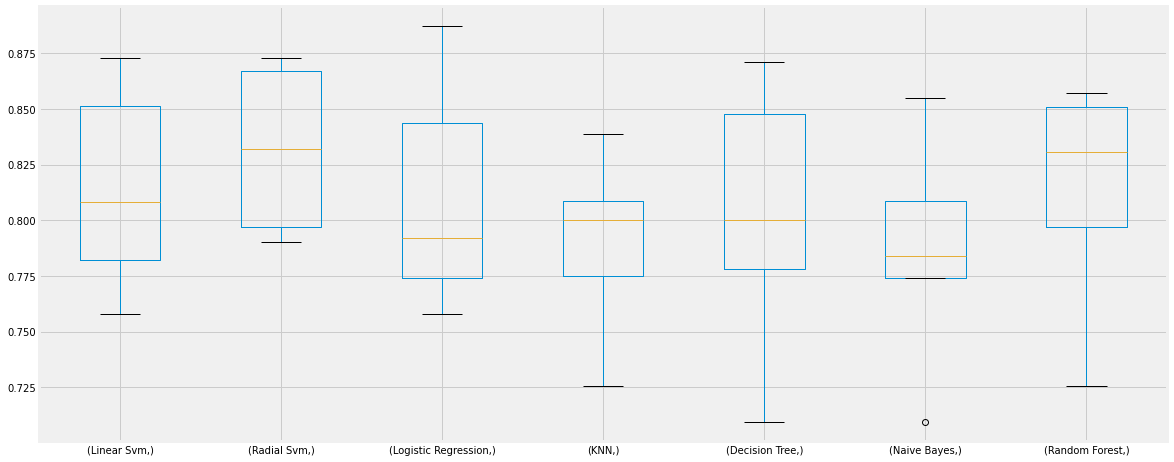

In [187]:
plt.subplots(1, 1, figsize = (18, 8))
box = pd.DataFrame(accuracy, index=[classifiers])
box.T.boxplot()

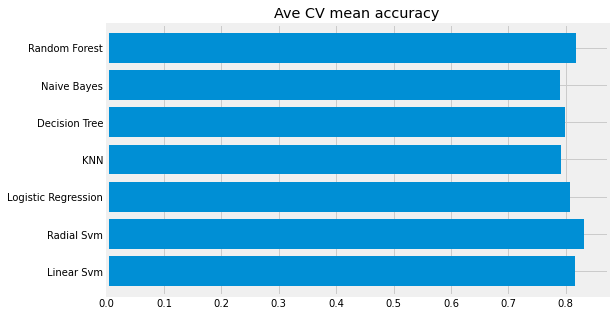

In [194]:
new_models_dataframe2['CV mean'].plot.barh(width = 0.8)
plt.title("Ave CV mean accuracy")
fig = plt.gcf()
fig.set_size_inches(8, 5)
plt.show()

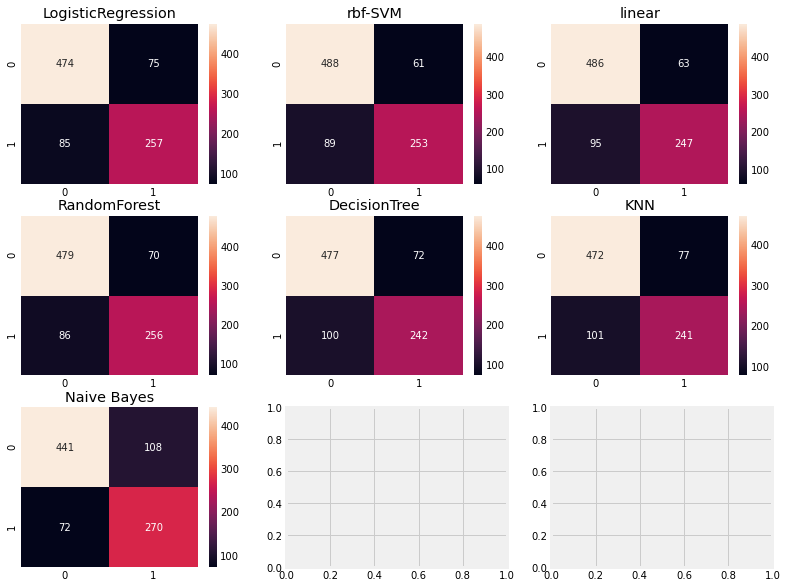

In [207]:
f, ax = plt.subplots(3, 3, figsize = (12, 10))
y_pred = cross_val_predict(LogisticRegression(), X, y, cv = 10)
sns.heatmap(confusion_matrix(y, y_pred), ax = ax[0, 0], annot = True, fmt = '2.0f')
ax[0, 0].set_title('LogisticRegression')
y_pred = cross_val_predict(svm.SVC(kernel = 'rbf'), X, y, cv = 10)
sns.heatmap(confusion_matrix(y, y_pred), ax = ax[0, 1], annot = True, fmt = '2.0f')
ax[0, 1].set_title('rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel = 'linear'), X, y, cv = 10)
sns.heatmap(confusion_matrix(y, y_pred), ax = ax[0, 2], annot = True, fmt = '2.0f')
ax[0, 2].set_title('linear')
y_pred = cross_val_predict(RandomForestClassifier(), X, y, cv = 10)
sns.heatmap(confusion_matrix(y, y_pred), ax = ax[1, 0], annot = True, fmt = '2.0f')
ax[1, 0].set_title('RandomForest')
y_pred = cross_val_predict(DecisionTreeClassifier(), X, y, cv = 10)
sns.heatmap(confusion_matrix(y, y_pred), ax = ax[1, 1], annot = True, fmt = '2.0f')
ax[1, 1].set_title('DecisionTree')
y_pred = cross_val_predict(KNeighborsClassifier(), X, y, cv = 10)
sns.heatmap(confusion_matrix(y, y_pred), ax = ax[1, 2], annot = True, fmt = '2.0f')
ax[1, 2].set_title('KNN')
y_pred = cross_val_predict(GaussianNB(), X, y, cv = 10)
sns.heatmap(confusion_matrix(y, y_pred), ax = ax[2, 0], annot = True, fmt = '2.0f')
ax[2, 0].set_title('Naive Bayes')
plt.subplots_adjust(hspace = 0.2, wspace = 0.2)
plt.show()

In [208]:
########################################## VOTING #########################################################

In [209]:
from sklearn.ensemble import VotingClassifier
ensemble_voting = VotingClassifier(estimators=[
    ('KNN', KNeighborsClassifier()),
    ('rbf', svm.SVC(kernel='rbf', probability=True)),
    ('RFC', RandomForestClassifier()),
    ('LR', LogisticRegression()),
    ('DT', DecisionTreeClassifier(random_state=0)),
    ('NB', GaussianNB()),
    ('linear', svm.SVC(kernel='linear', probability=True))
], voting='soft').fit(train_X, train_y)

print(ensemble_voting.score(test_X, test_y))
print(cross_val_score(ensemble_voting, train_X, train_y, cv=20, scoring='accuracy').mean())

0.832089552238806
0.8172379032258064


In [210]:
from sklearn.ensemble import BaggingClassifier
tree = DecisionTreeClassifier(max_depth=None)
model = BaggingClassifier(base_estimator=tree, n_estimators=800)
model.fit(train_X, train_y)
bag_pre = model.predict(test_X)
print(metrics.accuracy_score(bag_pre, test_y))
print(cross_val_score(model, train_X, train_y, cv=10, scoring='accuracy').mean())

0.8171641791044776
0.8025857654889913


In [214]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.1)
result = cross_val_score(ada, train_X, train_y, scoring="accuracy")
print(result.mean())

0.8169935483870967


In [215]:
from sklearn.ensemble import GradientBoostingClassifier

grad = GradientBoostingClassifier(n_estimators=500, random_state=0, learning_rate=0.1)
result = cross_val_score(grad, train_X, train_y, cv =10, scoring='accuracy')
print(result.mean())

0.8042498719918074


In [216]:
import xgboost as xg
xgboost = xg.XGBClassifier()
result = cross_val_score(xgboost, train_X, train_y, cv=10, scoring='accuracy')
print(result.mean())

[16:36:15] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:36:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:36:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:36:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

In [217]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier()
res = cross_val_score(hgb, train_X, train_y, cv=10, scoring="accuracy")
print(res.mean())

0.8105990783410139


In [222]:
def objective_xg(trial):
    params = {
        'eta':trial.suggest_loguniform('eta', 1e-8, 1.0),
        'gamma':trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'max_depth':trial.suggest_int('max_depth', 1, 20)
    }
    model = xg.XGBClassifier(**params)
    score = cross_val_score(model, train_X, train_y, cv=10, scoring='accuracy')
    score = score.mean()
    return 1 - score



In [223]:
study = optuna.create_study(sampler=optuna.samplers.RandomSampler(seed=0))
study.optimize(objective_xg, n_trials=100)
print(study.best_params)

[I 2021-11-05 16:46:46,494] A new study created in memory with name: no-name-997c1c43-d068-4dc6-a9ed-c32f7b78616c


[16:46:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:46:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:46:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:46:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:46:47,728] Trial 0 finished with value: 0.19270353302611376 and parameters: {'eta': 0.00024575820789209964, 'gamma': 0.0052664132043252, 'max_depth': 13}. Best is trial 0 with value: 0.19270353302611376.


[16:46:47] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:46:47] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:46:47] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:46:47] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:46:49,021] Trial 1 finished with value: 0.19270353302611376 and parameters: {'eta': 0.00022859433522173892, 'gamma': 2.4504079607415994e-05, 'max_depth': 13}. Best is trial 0 with value: 0.19270353302611376.


[16:46:49] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:46:49] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:46:49] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:46:49] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:46:50,512] Trial 2 finished with value: 0.19109062980030733 and parameters: {'eta': 3.167361913032263e-05, 'gamma': 0.13620216352659412, 'max_depth': 20}. Best is trial 2 with value: 0.19109062980030733.


[16:46:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:46:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:46:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:46:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:46:51,917] Trial 3 finished with value: 0.19267793138760891 and parameters: {'eta': 1.1682402109066314e-05, 'gamma': 0.021567524728780586, 'max_depth': 11}. Best is trial 2 with value: 0.19109062980030733.


[16:46:51] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:46:51] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:46:51] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:46:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:46:52,391] Trial 4 finished with value: 0.22644649257552474 and parameters: {'eta': 0.000350232535935302, 'gamma': 0.2539645541511531, 'max_depth': 2}. Best is trial 2 with value: 0.19109062980030733.


[16:46:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:46:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:46:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:46:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:46:53,880] Trial 5 finished with value: 0.19267793138760891 and parameters: {'eta': 4.9777650902423137e-08, 'gamma': 1.4512665303724043e-08, 'max_depth': 17}. Best is trial 2 with value: 0.19109062980030733.


[16:46:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:46:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:46:54] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:46:54] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:46:55,505] Trial 6 finished with value: 0.18622631848438298 and parameters: {'eta': 0.016797861943261036, 'gamma': 0.09122149510449752, 'max_depth': 20}. Best is trial 6 with value: 0.18622631848438298.


[16:46:55] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:46:55] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:46:55] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:46:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:46:56,919] Trial 7 finished with value: 0.1894265232974911 and parameters: {'eta': 0.024732528245672566, 'gamma': 4.9185251681822834e-05, 'max_depth': 16}. Best is trial 6 with value: 0.18622631848438298.


[16:46:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:46:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:46:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:46:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:46:57,728] Trial 8 finished with value: 0.19587813620071692 and parameters: {'eta': 8.834773237917946e-08, 'gamma': 0.001316340279131417, 'max_depth': 3}. Best is trial 6 with value: 0.18622631848438298.


[16:46:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:46:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:46:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:46:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:46:58,906] Trial 9 finished with value: 0.1926267281105991 and parameters: {'eta': 0.36087046265775286, 'gamma': 0.00014955005393691516, 'max_depth': 9}. Best is trial 6 with value: 0.18622631848438298.


[16:46:58] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:46:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:46:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:46:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:47:00,255] Trial 10 finished with value: 0.19267793138760891 and parameters: {'eta': 1.3075096319371512e-06, 'gamma': 0.01562678062781788, 'max_depth': 10}. Best is trial 6 with value: 0.18622631848438298.


[16:47:00] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:00] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:00] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:00] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:47:01,581] Trial 11 finished with value: 0.19265232974910396 and parameters: {'eta': 0.0003527537107422774, 'gamma': 1.4135735278417051e-08, 'max_depth': 13}. Best is trial 6 with value: 0.18622631848438298.


[16:47:01] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:01] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:01] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:01] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:47:02,991] Trial 12 finished with value: 0.19103942652329753 and parameters: {'eta': 0.0007884347942330393, 'gamma': 0.0008619299566126549, 'max_depth': 19}. Best is trial 6 with value: 0.18622631848438298.


[16:47:03] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:03] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:03] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:03] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:47:04,367] Trial 13 finished with value: 0.18940092165898614 and parameters: {'eta': 0.0028481469492314926, 'gamma': 7.517322886250534e-06, 'max_depth': 9}. Best is trial 6 with value: 0.18622631848438298.


[16:47:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:47:05,781] Trial 14 finished with value: 0.1845878136200716 and parameters: {'eta': 0.0038110931813691734, 'gamma': 3.0325206929428826e-08, 'max_depth': 14}. Best is trial 14 with value: 0.1845878136200716.


[16:47:05] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:05] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:05] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:05] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:47:06,493] Trial 15 finished with value: 0.19426523297491038 and parameters: {'eta': 0.0023179440931861113, 'gamma': 4.820149280505929e-07, 'max_depth': 3}. Best is trial 14 with value: 0.1845878136200716.


[16:47:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:47:07,930] Trial 16 finished with value: 0.19267793138760891 and parameters: {'eta': 3.3375425208595893e-06, 'gamma': 8.122433559209657e-06, 'max_depth': 12}. Best is trial 14 with value: 0.1845878136200716.


[16:47:07] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:08] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:08] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:08] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:47:08,661] Trial 17 finished with value: 0.19587813620071692 and parameters: {'eta': 3.227097654537013e-05, 'gamma': 0.8072177525850062, 'max_depth': 3}. Best is trial 14 with value: 0.1845878136200716.


[16:47:08] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:08] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:08] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:08] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:47:10,119] Trial 18 finished with value: 0.19267793138760891 and parameters: {'eta': 4.688285477825765e-07, 'gamma': 1.9519835035916886e-07, 'max_depth': 14}. Best is trial 14 with value: 0.1845878136200716.


[16:47:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:47:11,222] Trial 19 finished with value: 0.19907834101382493 and parameters: {'eta': 1.0625094963538647e-06, 'gamma': 5.3763332795841517e-05, 'max_depth': 5}. Best is trial 14 with value: 0.1845878136200716.


[16:47:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:47:12,643] Trial 20 finished with value: 0.19267793138760891 and parameters: {'eta': 1.8696343095249954e-07, 'gamma': 7.638377698149978e-08, 'max_depth': 14}. Best is trial 14 with value: 0.1845878136200716.


[16:47:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:47:14,048] Trial 21 finished with value: 0.1942652329749105 and parameters: {'eta': 1.274863275624317e-07, 'gamma': 3.738168671235754e-07, 'max_depth': 8}. Best is trial 14 with value: 0.1845878136200716.


[16:47:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:14] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:14] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:14] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:47:15,920] Trial 22 finished with value: 0.19265232974910396 and parameters: {'eta': 0.036978206108429786, 'gamma': 5.9815013672851e-08, 'max_depth': 17}. Best is trial 14 with value: 0.1845878136200716.


[16:47:15] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:47:17,407] Trial 23 finished with value: 0.19590373783922177 and parameters: {'eta': 5.8720164445859745e-08, 'gamma': 0.6481502906344189, 'max_depth': 10}. Best is trial 14 with value: 0.1845878136200716.


[16:47:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:47:18,958] Trial 24 finished with value: 0.19582693292370712 and parameters: {'eta': 0.6517615040663892, 'gamma': 0.0006898650733811707, 'max_depth': 15}. Best is trial 14 with value: 0.1845878136200716.


[16:47:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:47:19,735] Trial 25 finished with value: 0.19587813620071692 and parameters: {'eta': 2.0582699712570616e-08, 'gamma': 1.8300194291134087e-06, 'max_depth': 3}. Best is trial 14 with value: 0.1845878136200716.


[16:47:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:47:21,224] Trial 26 finished with value: 0.19590373783922177 and parameters: {'eta': 2.3394920847694654e-06, 'gamma': 8.908852152588355e-08, 'max_depth': 7}. Best is trial 14 with value: 0.1845878136200716.


[16:47:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:47:22,728] Trial 27 finished with value: 0.1943164362519202 and parameters: {'eta': 2.0611232207702536e-05, 'gamma': 3.259717550795507e-08, 'max_depth': 14}. Best is trial 14 with value: 0.1845878136200716.


[16:47:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:23] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:47:24,217] Trial 28 finished with value: 0.19265232974910396 and parameters: {'eta': 0.0003410449582643011, 'gamma': 1.3277488303684095e-06, 'max_depth': 11}. Best is trial 14 with value: 0.1845878136200716.


[16:47:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:47:25,642] Trial 29 finished with value: 0.1942652329749105 and parameters: {'eta': 5.643182376908858e-08, 'gamma': 0.0004051090678768292, 'max_depth': 19}. Best is trial 14 with value: 0.1845878136200716.


[16:47:25] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:25] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:25] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:25] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:47:26,320] Trial 30 finished with value: 0.19587813620071692 and parameters: {'eta': 3.5363205079386576e-06, 'gamma': 0.0021841529108138566, 'max_depth': 3}. Best is trial 14 with value: 0.1845878136200716.


[16:47:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:47:27,204] Trial 31 finished with value: 0.19267793138760891 and parameters: {'eta': 0.005377960807748353, 'gamma': 2.0665634478498945e-06, 'max_depth': 4}. Best is trial 14 with value: 0.1845878136200716.


[16:47:27] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:27] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:27] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:27] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:47:28,502] Trial 32 finished with value: 0.19103942652329753 and parameters: {'eta': 0.0004921567869290511, 'gamma': 1.4483061321722743e-08, 'max_depth': 17}. Best is trial 14 with value: 0.1845878136200716.


[16:47:28] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:28] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:28] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:28] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:47:29,654] Trial 33 finished with value: 0.19754224270353316 and parameters: {'eta': 1.0903446815769254e-08, 'gamma': 0.0026456494193148254, 'max_depth': 6}. Best is trial 14 with value: 0.1845878136200716.


[16:47:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:47:30,733] Trial 34 finished with value: 0.20547875064004095 and parameters: {'eta': 0.007612935967998269, 'gamma': 0.4983200494234886, 'max_depth': 5}. Best is trial 14 with value: 0.1845878136200716.


[16:47:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:47:31,993] Trial 35 finished with value: 0.19103942652329753 and parameters: {'eta': 0.0004066854878593079, 'gamma': 0.0005449233905603223, 'max_depth': 12}. Best is trial 14 with value: 0.1845878136200716.


[16:47:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:47:33,302] Trial 36 finished with value: 0.1975166410650283 and parameters: {'eta': 6.090501593034856e-07, 'gamma': 0.41878593957213306, 'max_depth': 9}. Best is trial 14 with value: 0.1845878136200716.


[16:47:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:47:34,688] Trial 37 finished with value: 0.20066564260112651 and parameters: {'eta': 0.05905672776605967, 'gamma': 0.003943067417080244, 'max_depth': 6}. Best is trial 14 with value: 0.1845878136200716.


[16:47:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:35] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:35] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:47:36,995] Trial 38 finished with value: 0.1942652329749105 and parameters: {'eta': 0.032387882693135306, 'gamma': 1.4860927887500769e-05, 'max_depth': 18}. Best is trial 14 with value: 0.1845878136200716.


[16:47:37] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:37] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:37] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:37] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:47:39,047] Trial 39 finished with value: 0.19103942652329753 and parameters: {'eta': 0.0004468718327886271, 'gamma': 0.1132095058758038, 'max_depth': 14}. Best is trial 14 with value: 0.1845878136200716.


[16:47:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:47:40,624] Trial 40 finished with value: 0.18778801843317972 and parameters: {'eta': 0.006339196857344714, 'gamma': 0.00010246960342458135, 'max_depth': 20}. Best is trial 14 with value: 0.1845878136200716.


[16:47:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:47:42,078] Trial 41 finished with value: 0.1894265232974911 and parameters: {'eta': 0.0014188013526219528, 'gamma': 2.4594635381022534e-05, 'max_depth': 13}. Best is trial 14 with value: 0.1845878136200716.


[16:47:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:47:43,435] Trial 42 finished with value: 0.19267793138760891 and parameters: {'eta': 1.424116723686654e-08, 'gamma': 2.5858214481400304e-06, 'max_depth': 14}. Best is trial 14 with value: 0.1845878136200716.


[16:47:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:47:44,866] Trial 43 finished with value: 0.19267793138760891 and parameters: {'eta': 2.0922850778575796e-06, 'gamma': 0.0008792723816659194, 'max_depth': 9}. Best is trial 14 with value: 0.1845878136200716.


[16:47:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:45] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:45] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:47:46,185] Trial 44 finished with value: 0.1942652329749105 and parameters: {'eta': 1.2128092867209906e-07, 'gamma': 2.433652735438816e-06, 'max_depth': 12}. Best is trial 14 with value: 0.1845878136200716.


[16:47:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:47:47,463] Trial 45 finished with value: 0.19103942652329753 and parameters: {'eta': 0.0005333129015659538, 'gamma': 0.0003931895716831657, 'max_depth': 14}. Best is trial 14 with value: 0.1845878136200716.


[16:47:47] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:47] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:47] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:47] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:47:48,991] Trial 46 finished with value: 0.18781362007168467 and parameters: {'eta': 0.00164750279486046, 'gamma': 2.8271410948251385e-05, 'max_depth': 18}. Best is trial 14 with value: 0.1845878136200716.


[16:47:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:49] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:49] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:49] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:47:50,403] Trial 47 finished with value: 0.19267793138760891 and parameters: {'eta': 8.719567829140433e-06, 'gamma': 3.0684524815021146e-05, 'max_depth': 18}. Best is trial 14 with value: 0.1845878136200716.


[16:47:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:47:51,082] Trial 48 finished with value: 0.18466461853558636 and parameters: {'eta': 0.02815476536381187, 'gamma': 0.004276698834934592, 'max_depth': 3}. Best is trial 14 with value: 0.1845878136200716.


[16:47:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:51] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:51] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:51] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:47:52,537] Trial 49 finished with value: 0.19902713773681524 and parameters: {'eta': 0.22691380062504302, 'gamma': 0.005175238826679791, 'max_depth': 20}. Best is trial 14 with value: 0.1845878136200716.


[16:47:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:47:53,377] Trial 50 finished with value: 0.18950332821300575 and parameters: {'eta': 1.5688681171052366e-07, 'gamma': 0.08810660337537281, 'max_depth': 4}. Best is trial 14 with value: 0.1845878136200716.


[16:47:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:47:54,806] Trial 51 finished with value: 0.19103942652329753 and parameters: {'eta': 0.0008403815598095022, 'gamma': 9.78497820827326e-08, 'max_depth': 17}. Best is trial 14 with value: 0.1845878136200716.


[16:47:54] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:54] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:55] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:55] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:47:56,493] Trial 52 finished with value: 0.19103942652329753 and parameters: {'eta': 0.02874429555974589, 'gamma': 0.00035711320458027974, 'max_depth': 9}. Best is trial 14 with value: 0.1845878136200716.


[16:47:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:47:57,787] Trial 53 finished with value: 0.1942652329749105 and parameters: {'eta': 3.5754932594422414e-08, 'gamma': 0.0037969089700001014, 'max_depth': 10}. Best is trial 14 with value: 0.1845878136200716.


[16:47:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:58] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:58] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:47:59,134] Trial 54 finished with value: 0.18778801843317972 and parameters: {'eta': 0.0059764707147453786, 'gamma': 0.08532152464454834, 'max_depth': 20}. Best is trial 14 with value: 0.1845878136200716.


[16:47:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:48:00,600] Trial 55 finished with value: 0.1990527393753201 and parameters: {'eta': 0.07021448893715654, 'gamma': 1.2408311098510618e-08, 'max_depth': 8}. Best is trial 14 with value: 0.1845878136200716.


[16:48:00] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:00] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:00] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:01] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:48:01,975] Trial 56 finished with value: 0.1893753200204813 and parameters: {'eta': 0.006917107089291241, 'gamma': 2.3606816168276355e-07, 'max_depth': 11}. Best is trial 14 with value: 0.1845878136200716.


[16:48:01] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:48:02,459] Trial 57 finished with value: 0.23274449564772137 and parameters: {'eta': 2.720845657461687e-08, 'gamma': 3.9808168702672347e-07, 'max_depth': 1}. Best is trial 14 with value: 0.1845878136200716.


[16:48:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:48:04,006] Trial 58 finished with value: 0.19103942652329753 and parameters: {'eta': 0.022365655279502725, 'gamma': 6.185823220208556e-07, 'max_depth': 7}. Best is trial 14 with value: 0.1845878136200716.


[16:48:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:48:04,493] Trial 59 finished with value: 0.19109062980030722 and parameters: {'eta': 0.26585837611993773, 'gamma': 0.00431832391488306, 'max_depth': 1}. Best is trial 14 with value: 0.1845878136200716.


[16:48:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:48:05,958] Trial 60 finished with value: 0.1942652329749105 and parameters: {'eta': 2.0775584544033118e-07, 'gamma': 0.0009371890635651658, 'max_depth': 12}. Best is trial 14 with value: 0.1845878136200716.


[16:48:05] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:48:07,292] Trial 61 finished with value: 0.19267793138760891 and parameters: {'eta': 8.000968691795226e-07, 'gamma': 0.29765417836096464, 'max_depth': 13}. Best is trial 14 with value: 0.1845878136200716.


[16:48:07] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:07] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:07] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:07] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:48:08,877] Trial 62 finished with value: 0.19270353302611376 and parameters: {'eta': 0.00019278019898128873, 'gamma': 0.0005239378948991113, 'max_depth': 15}. Best is trial 14 with value: 0.1845878136200716.


[16:48:08] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:48:09,997] Trial 63 finished with value: 0.19907834101382493 and parameters: {'eta': 3.130112622128096e-06, 'gamma': 1.533799167560123e-05, 'max_depth': 5}. Best is trial 14 with value: 0.1845878136200716.


[16:48:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:48:11,432] Trial 64 finished with value: 0.1975166410650283 and parameters: {'eta': 3.08705272506571e-07, 'gamma': 0.3589046787131753, 'max_depth': 15}. Best is trial 14 with value: 0.1845878136200716.


[16:48:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:48:12,598] Trial 65 finished with value: 0.200768049155146 and parameters: {'eta': 8.388232682837919e-05, 'gamma': 6.596552508781356e-07, 'max_depth': 6}. Best is trial 14 with value: 0.1845878136200716.


[16:48:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:48:13,820] Trial 66 finished with value: 0.19590373783922177 and parameters: {'eta': 2.9122810385414567e-08, 'gamma': 2.9876726019173488e-05, 'max_depth': 7}. Best is trial 14 with value: 0.1845878136200716.


[16:48:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:14] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:48:14,653] Trial 67 finished with value: 0.19429083461341534 and parameters: {'eta': 0.0037217561142979627, 'gamma': 1.051997515967866e-05, 'max_depth': 4}. Best is trial 14 with value: 0.1845878136200716.


[16:48:14] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:14] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:14] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:14] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:48:15,946] Trial 68 finished with value: 0.1942652329749105 and parameters: {'eta': 1.575541427762952e-08, 'gamma': 3.451413962672506e-08, 'max_depth': 14}. Best is trial 14 with value: 0.1845878136200716.


[16:48:15] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:15] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:48:17,324] Trial 69 finished with value: 0.19270353302611376 and parameters: {'eta': 4.261620338546055e-05, 'gamma': 0.00019617049541740744, 'max_depth': 18}. Best is trial 14 with value: 0.1845878136200716.


[16:48:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:48:18,571] Trial 70 finished with value: 0.19098822324628784 and parameters: {'eta': 0.8369732522818132, 'gamma': 5.434703748197727e-07, 'max_depth': 14}. Best is trial 14 with value: 0.1845878136200716.


[16:48:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:48:19,848] Trial 71 finished with value: 0.19267793138760891 and parameters: {'eta': 1.2781417286909168e-06, 'gamma': 1.4628776195564048e-08, 'max_depth': 16}. Best is trial 14 with value: 0.1845878136200716.


[16:48:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:48:21,193] Trial 72 finished with value: 0.19106502816180237 and parameters: {'eta': 3.631927800780891e-06, 'gamma': 1.1687218226775379e-05, 'max_depth': 12}. Best is trial 14 with value: 0.1845878136200716.


[16:48:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:48:22,835] Trial 73 finished with value: 0.19902713773681513 and parameters: {'eta': 0.04450283129212724, 'gamma': 0.0010761052463669095, 'max_depth': 18}. Best is trial 14 with value: 0.1845878136200716.


[16:48:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:23] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:48:23,686] Trial 74 finished with value: 0.18950332821300575 and parameters: {'eta': 1.542894669189412e-06, 'gamma': 0.024231186000942782, 'max_depth': 4}. Best is trial 14 with value: 0.1845878136200716.


[16:48:23] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:23] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:23] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:23] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:48:24,604] Trial 75 finished with value: 0.19907834101382493 and parameters: {'eta': 0.4191150495981236, 'gamma': 0.003161594818168373, 'max_depth': 5}. Best is trial 14 with value: 0.1845878136200716.


[16:48:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:48:25,729] Trial 76 finished with value: 0.19902713773681524 and parameters: {'eta': 0.3792841759117245, 'gamma': 0.007028237909429172, 'max_depth': 6}. Best is trial 14 with value: 0.1845878136200716.


[16:48:25] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:25] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:25] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:25] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:48:26,164] Trial 77 finished with value: 0.23274449564772137 and parameters: {'eta': 5.087399218563492e-07, 'gamma': 0.00013983172377391104, 'max_depth': 1}. Best is trial 14 with value: 0.1845878136200716.


[16:48:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:48:27,435] Trial 78 finished with value: 0.19267793138760891 and parameters: {'eta': 4.5683629798283453e-07, 'gamma': 2.4973749431775795e-05, 'max_depth': 8}. Best is trial 14 with value: 0.1845878136200716.


[16:48:27] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:27] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:27] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:27] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:48:28,692] Trial 79 finished with value: 0.19270353302611376 and parameters: {'eta': 5.112147723133391e-05, 'gamma': 1.6635262195405436e-06, 'max_depth': 12}. Best is trial 14 with value: 0.1845878136200716.


[16:48:28] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:28] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:48:30,242] Trial 80 finished with value: 0.19423963133640554 and parameters: {'eta': 0.08144132811911443, 'gamma': 8.714748287844094e-08, 'max_depth': 11}. Best is trial 14 with value: 0.1845878136200716.


[16:48:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:48:31,510] Trial 81 finished with value: 0.1942652329749105 and parameters: {'eta': 1.1390554091227133e-07, 'gamma': 0.005430970571865733, 'max_depth': 8}. Best is trial 14 with value: 0.1845878136200716.


[16:48:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:48:32,165] Trial 82 finished with value: 0.19426523297491038 and parameters: {'eta': 0.0003337109788528371, 'gamma': 2.925759943578035e-07, 'max_depth': 3}. Best is trial 14 with value: 0.1845878136200716.


[16:48:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:48:33,423] Trial 83 finished with value: 0.19270353302611376 and parameters: {'eta': 8.025096163485014e-05, 'gamma': 6.996839355377205e-06, 'max_depth': 19}. Best is trial 14 with value: 0.1845878136200716.


[16:48:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:48:34,896] Trial 84 finished with value: 0.19101382488479268 and parameters: {'eta': 0.013261786453620347, 'gamma': 0.00975683495961976, 'max_depth': 19}. Best is trial 14 with value: 0.1845878136200716.


[16:48:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:35] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:35] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:48:36,171] Trial 85 finished with value: 0.19267793138760891 and parameters: {'eta': 4.6492134286430623e-08, 'gamma': 0.0002615409876262629, 'max_depth': 12}. Best is trial 14 with value: 0.1845878136200716.


[16:48:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:48:37,090] Trial 86 finished with value: 0.1990527393753201 and parameters: {'eta': 0.4960106807394582, 'gamma': 2.173602947539925e-06, 'max_depth': 5}. Best is trial 14 with value: 0.1845878136200716.


[16:48:37] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:37] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:37] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:37] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:48:38,506] Trial 87 finished with value: 0.19267793138760891 and parameters: {'eta': 6.343830025534801e-08, 'gamma': 1.3534338579304768e-08, 'max_depth': 19}. Best is trial 14 with value: 0.1845878136200716.


[16:48:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:48:39,611] Trial 88 finished with value: 0.20232974910394264 and parameters: {'eta': 0.0022873486793417263, 'gamma': 0.019108354782767737, 'max_depth': 6}. Best is trial 14 with value: 0.1845878136200716.


[16:48:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:48:40,993] Trial 89 finished with value: 0.19103942652329753 and parameters: {'eta': 0.0004912259819769604, 'gamma': 3.248195265267119e-08, 'max_depth': 10}. Best is trial 14 with value: 0.1845878136200716.


[16:48:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:48:42,295] Trial 90 finished with value: 0.19580133128520227 and parameters: {'eta': 0.660634299289068, 'gamma': 0.10281156322268878, 'max_depth': 7}. Best is trial 14 with value: 0.1845878136200716.


[16:48:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:48:43,821] Trial 91 finished with value: 0.1990015360983104 and parameters: {'eta': 0.49267580665990407, 'gamma': 7.13859941029657e-07, 'max_depth': 19}. Best is trial 14 with value: 0.1845878136200716.


[16:48:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:48:45,304] Trial 92 finished with value: 0.1909626216077831 and parameters: {'eta': 0.33964219400394113, 'gamma': 0.024752592880820334, 'max_depth': 13}. Best is trial 14 with value: 0.1845878136200716.


[16:48:45] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:45] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:45] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:45] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:48:46,930] Trial 93 finished with value: 0.19265232974910396 and parameters: {'eta': 0.0986969502238076, 'gamma': 2.2088299179531348e-06, 'max_depth': 17}. Best is trial 14 with value: 0.1845878136200716.


[16:48:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:47] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:47] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:47] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:48:48,146] Trial 94 finished with value: 0.1974654377880185 and parameters: {'eta': 0.0008770281544161894, 'gamma': 1.2761298343825283e-08, 'max_depth': 7}. Best is trial 14 with value: 0.1845878136200716.


[16:48:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:48:49,720] Trial 95 finished with value: 0.1975166410650282 and parameters: {'eta': 1.5315348640381339e-07, 'gamma': 0.7155419802639282, 'max_depth': 10}. Best is trial 14 with value: 0.1845878136200716.


[16:48:49] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:49] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:49] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:48:51,416] Trial 96 finished with value: 0.19270353302611376 and parameters: {'eta': 9.530834407097342e-05, 'gamma': 0.0013055097847401802, 'max_depth': 8}. Best is trial 14 with value: 0.1845878136200716.


[16:48:51] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:51] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:51] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:51] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:48:52,428] Trial 97 finished with value: 0.18950332821300575 and parameters: {'eta': 1.2450940951403028e-07, 'gamma': 0.03775216526799782, 'max_depth': 4}. Best is trial 14 with value: 0.1845878136200716.


[16:48:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:48:52,971] Trial 98 finished with value: 0.22644649257552474 and parameters: {'eta': 0.00012318330737367303, 'gamma': 6.230691259227989e-07, 'max_depth': 2}. Best is trial 14 with value: 0.1845878136200716.


[16:48:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[I 2021-11-05 16:48:54,869] Trial 99 finished with value: 0.19905273937531986 and parameters: {'eta': 0.07898272973339235, 'gamma': 0.607233764788223, 'max_depth': 20}. Best is trial 14 with value: 0.1845878136200716.


{'eta': 0.0038110931813691734, 'gamma': 3.0325206929428826e-08, 'max_depth': 14}


In [224]:
from sklearn.ensemble import StackingClassifier

clf1 = svm.SVC(kernel = 'rbf', C = 2164.383970701054, gamma = 0.001062561994257736)
clf2 = LogisticRegression(C = 9.468257892380656)
clf3 = KNeighborsClassifier(n_neighbors = 22)
clf4 = GaussianNB()
clf5 = RandomForestClassifier(criterion = 'gini', n_estimators = 22, random_state = 42)

stacking_classifer_estimators = [
    ('rbf', clf1), ('knc', clf3), ('gnv', clf4), ('rfc', clf5)
]
clf = StackingClassifier(estimators=stacking_classifer_estimators, final_estimator=clf2)

result = cross_val_score(clf, train_X, train_y, cv=10, scoring="accuracy")
print(result.mean())

0.820174091141833


In [225]:
################################### FEATURE IMPORTANCE ##########################################

[17:01:35] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


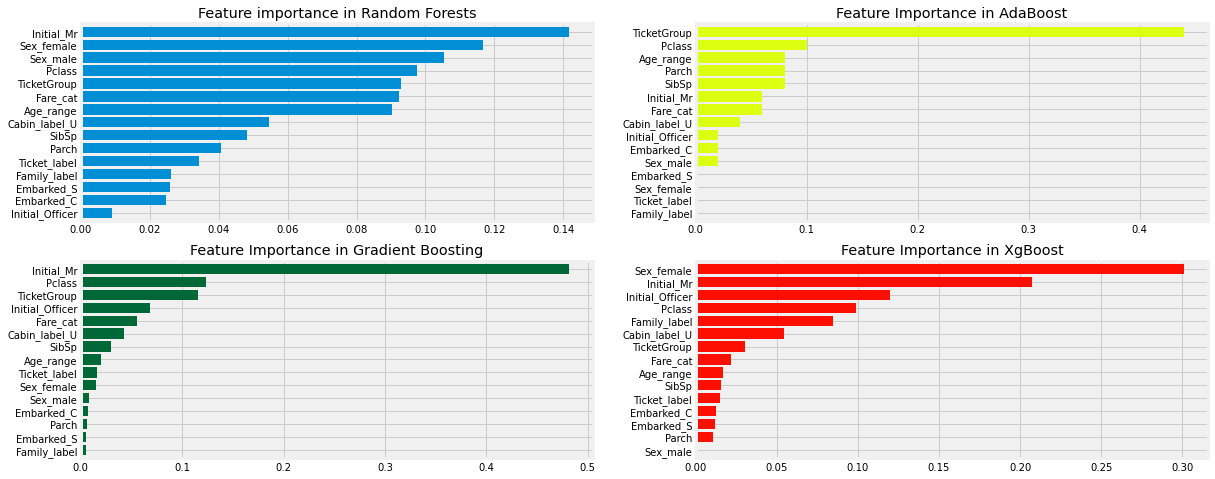

In [226]:
f, ax = plt.subplots(2, 2, figsize=(18, 8))
model = RandomForestClassifier(random_state=0)
model.fit(train_X, train_y)
pd.Series(model.feature_importances_, train_X.columns).sort_values(ascending=True).plot.barh(width = 0.8, ax = ax[0,0])
ax[0,0].set_title("Feature importance in Random Forests")
model=AdaBoostClassifier(random_state=0)
model.fit(train_X,train_y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model=GradientBoostingClassifier(random_state=0)
model.fit(train_X,train_y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model=xg.XGBClassifier(learning_rate=0.1)
model.fit(train_X,train_y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()

In [239]:
last_model = StackingClassifier(estimators=stacking_classifer_estimators, final_estimator=clf2)
last_model.fit(train_X, train_y)
last_prediction  = last_model.predict(test_data_)

In [240]:
last_prediction

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [241]:
submission_data

PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]

In [242]:
submission_data['Survived'] = last_prediction.astype(int)
submission_data

PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]

In [245]:
submission_data.to_csv("last_submission.csv", index=False)
print("Congratulations!! Seshank.. you did it")

Congratulations!! Seshank.. you did it
